<b>Data mining project - 2020/21</b><br>
<b>Authors</b>: [Alexandra Bradan](https://github.com/alexandrabradan), [Alice Graziani](https://github.com/alicegraziani25) and [Eleonora Cocciu](https://github.com/eleonoracocciu)<br>
<b>Python version</b>: 3.x<br>
<b>Last update: 21/05/2021<b>

In [2141]:
import os
import sys

import operator
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

from collections import Counter
from collections import OrderedDict

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from  matplotlib.ticker import FuncFormatter

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler



plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline

In [2142]:
tracks = pd.read_csv('../../data/fma_metadata/tracks.csv', index_col=0, header=[0, 1])
tracks.shape

(106574, 52)

In [2143]:
tracks.head(3).T

track_id                                                                  2  \
album  comments                                                           0   
       date_created                                     2008-11-26 01:44:45   
       date_released                                    2009-01-05 00:00:00   
       engineer                                                         NaN   
       favorites                                                          4   
       id                                                                 1   
       information                                                  <p></p>   
       listens                                                         6073   
       producer                                                         NaN   
       tags                                                              []   
       title                                           AWOL - A Way Of Life   
       tracks                                                             7   
       type                                                           Album   
artist active_year_begin                                2006-01-01 00:00:00   
       active_year_end                                                  NaN   
       associated_labels                                                NaN   
       bio                <p>A Way Of Life, A Collective of Hip-Hop from...   
       comments                                                           0   
       date_created                                     2008-11-26 01:42:32   
       favorites                                                          9   
       id                                                                 1   
       latitude                                                     40.0583   
       location                                                  New Jersey   
       longitude                                                   -74.4057   
       members            Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...   
       name                                                            AWOL   
       related_projects   The list of past projects is 2 long but every1...   
       tags                                                        ['awol']   
       website                      http://www.AzillionRecords.blogspot.com   
       wikipedia_page                                                   NaN   
set    split                                                       training   
       subset                                                         small   
track  bit_rate                                                      256000   
       comments                                                           0   
       composer                                                         NaN   
       date_created                                     2008-11-26 01:48:12   
       date_recorded                                    2008-11-26 00:00:00   
       duration                                                         168   
       favorites                                                          2   
       genre_top                                                    Hip-Hop   
       genres                                                          [21]   
       genres_all                                                      [21]   
       information                                                      NaN   
       interest                                                        4656   
       language_code                                                     en   
       license            Attribution-NonCommercial-ShareAlike 3.0 Inter...   
       listens                                                         1293   
       lyricist                                                         NaN   
       number                                                             3   
       publisher                                  

<h1>DataFrame's headers </h1>

In [2144]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   (album, comments)            106574 non-null  int64  
 1   (album, date_created)        103045 non-null  object 
 2   (album, date_released)       70294 non-null   object 
 3   (album, engineer)            15295 non-null   object 
 4   (album, favorites)           106574 non-null  int64  
 5   (album, id)                  106574 non-null  int64  
 6   (album, information)         83149 non-null   object 
 7   (album, listens)             106574 non-null  int64  
 8   (album, producer)            18060 non-null   object 
 9   (album, tags)                106574 non-null  object 
 10  (album, title)               105549 non-null  object 
 11  (album, tracks)              106574 non-null  int64  
 12  (album, type)                100066 non-null  object 
 13 

<h1>DataFrame's ids consistencies</h1>

<font color="fuchsia"><h6>('album', 'id') consistency </h6></font>

In [2145]:
def check_id_consistency_in_dataset(artist_or_album_flag):
    consistent_column_among_ids = []
    if artist_or_album_flag == 'album':
        for column_name in tracks.columns:
            if column_name[0] != 'track' and column_name[0] != 'set' and column_name[1] != 'id':
                consistent_column_among_ids.append(column_name)
    elif artist_or_album_flag == 'artist':
        for column_name in tracks.columns:
            if column_name[0] != 'track' and column_name[0] != 'set' and column_name[0] != 'album'and \
                                                                                        column_name[1] != 'id':
                consistent_column_among_ids.append(column_name)
    else:
        print("wrong artist_or_album_flag")
        sys.exit(-1)
    
    unique_ids = tracks[(artist_or_album_flag, 'id')].unique()
    print("TOTAL NUMBER OF UNIQUE %s=%s" % (artist_or_album_flag.upper(),len(unique_ids)))
    print()

    consistency_flag = True
    for aid in unique_ids:
        tmp_df = tracks[tracks[(artist_or_album_flag, 'id')] == aid][consistent_column_among_ids].dropna()
        dups = tmp_df.duplicated()
        for value, count in dups.value_counts().iteritems():
            # number of duplicate rows must be equal to N - 1, since the first row isn't a duplicate of itself,
            # the other 2,..., N are, insteaded, duplicates of the first in order to have an ID consistency
            if value:
                if count != tmp_df.shape[0] - 1: 
                    print(tmp_df)
                    print("inconsistent rows for id = %s" % aid)
                    consistency_flag = False
                    break
    if consistency_flag:
        print("Dataset is consistent for all %ss" % artist_or_album_flag)

In [2146]:
check_id_consistency_in_dataset('album')

TOTAL NUMBER OF UNIQUE ALBUM=14854

Dataset is consistent for all albums


<font color="fuchsia"><h6>('artist', 'id') consistency</h6></font>

In [2147]:
check_id_consistency_in_dataset('artist')

TOTAL NUMBER OF UNIQUE ARTIST=16341

Dataset is consistent for all artists


<font color="fuchsia"><h6>('track', 'id') consistency (duplicate rows) </h6></font>
Checking if exist duplicated rows (tracks with different ids, but related to same track)

In [2148]:
dups = tracks.duplicated()
if dups.any() == False:
    print("Dataset is consistent for all tracks")

# delete duplicate rows
# df.drop_duplicates(inplace=True)

Dataset is consistent for all tracks


<font color="fuchsia"><h6>('track', 'title') consistency </h6></font>
Checking if exists tracks having the same title.  
If a track have the same title, than we investigate if it belongs:
- to the same artist (a song can have the same name but be sung by different singers); 
- to the same album (multiple songs can be the same one, belonging to the same album, sung by the same artist, but having different intrinsic, characteristics, i.e. duration or listens);
- both.

In [2149]:
check0 = tracks[tracks[[('track', 'title')]].duplicated(keep=False)]
print("tracks with same title", check0.shape[0], len(check0[('track', 'title')].unique()))
check1 = tracks[tracks[[('artist', 'id'), ('track', 'title')]].duplicated(keep=False)]
print("tracks with same title and artist id", len(check1[('artist', 'id')].unique()))
check2 = tracks[tracks[[('album', 'id'), ('track', 'title')]].duplicated(keep=False)]
print("tracks with same title and album id", len(check2[('album', 'id')].unique()))
check3 = tracks[tracks[[('album', 'id'),('artist', 'id'), ('track', 'title')]].duplicated(keep=False)]
print("tracks with same title, artist id and album id", len(check3[('track', 'title')].unique()))

tracks with same title 17860 6273
tracks with same title and artist id 1020
tracks with same title and album id 228
tracks with same title, artist id and album id 183


17.860 tracks are involved in 6.273 duplicated titles (belonging the same artist/album or not).
Bellow, we try to get more insight in this phenomena.

In [2150]:
def sns_barplot_x_and_y(param_dict, x_label, title, log_flag, rotation_flag):
    sns.barplot(x=list(param_dict.keys()), y=list(param_dict.values()), color="#4C72B0")
    if log_flag:
        plt.yscale('log')
    if rotation_flag:
        plt.xticks(rotation=90)
    plt.xlabel(x_label)
    plt.ylabel("count")
    plt.title(title)
    plt.show()

{1: 2317, 2: 2666, 3: 607, 4: 270, 5: 131, 6: 83, 7: 48, 8: 31, 9: 23, 10: 18, 11: 8, 12: 10, 13: 3, 14: 8, 15: 8, 16: 6, 17: 8, 18: 3, 19: 1, 20: 4, 22: 3, 23: 5, 24: 1, 25: 1, 26: 2, 27: 1, 28: 1, 36: 1, 48: 1, 59: 1, 90: 1, 110: 1, 127: 1}
number of artists with at least one duplicate track title 5422


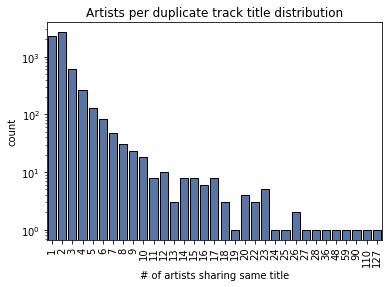

In [2151]:
artists = set()
duplicate_titles_artists = {}  # key=# duplicate tracks title, value=# artists
unique_duplicate_titles = list(check0[('track', 'title')].unique())
for title in unique_duplicate_titles:
    tmp_list = tracks[(tracks[('track', 'title')] == title)][('artist', 'id')].values
    # retrieving duplicate title's artists (if there more than one)
    key = len(set(tmp_list))
    if key > 0:
        try:
            count = duplicate_titles_artists[key]
            count += 1
            duplicate_titles_artists[key] = count
        except KeyError:
            duplicate_titles_artists[key] = 1
        artists.update(set(tmp_list))
sorted_duplicate_titles_artists = dict(OrderedDict(sorted(duplicate_titles_artists.items())))
print(sorted_duplicate_titles_artists)
print("number of artists with at least one duplicate track title", len(artists))
sns_barplot_x_and_y(duplicate_titles_artists, "# of artists sharing same title", "Artists per duplicate track title distribution", True, True)

**1020 artists have at least one duplicate track**, while **4402 artists share at least one track title with another artist in this same pool**. 

The majority of artists having the same track title are two and this phenomenon is more accentuated than a single artist having a duplicate song. Acctually, we detected that 127 artiststs shared the same 'Untitle' track title, which uncover **missing values in the ('track', 'title') column**.

In [2152]:
missing_title_values = set()
for title in tracks[('track', 'title')].unique():
    if str(title) != "nan":
        if "Untitled" in title or "unknown" in title.lower():
            missing_title_values.add(title)
# print(missing_title_values)

In [2153]:
num_missing_title_values = 0
for title in tracks[('track', 'title')]:
    if str(title) != "nan":
        if "untitled" in title.lower() or "unknown" in title.lower():
            num_missing_title_values += 1
print("num_missing_title_values", num_missing_title_values)

num_missing_title_values 825


In [2154]:
# checking tracks with explicit missing values (NaN)
tracks[tracks[('track', 'title')].isna()][('track', 'title')]

track_id
26620    NaN
Name: (track, title), dtype: object

In [2155]:
# checking
tracks[tracks[('track', 'title')].isna()][('track', 'title')]

track_id
26620    NaN
Name: (track, title), dtype: object

<b><font color="green">RECAP:
We detect that among many shared tracks' titles, 127 artists display 'Untitled' as songs' name(<font color="red">Missing title value</font>). Other missing values in the ('track', 'title') column are '(Untitled), (Title Unknown)', 'Title Unknown', '(title unknown)', 'title unknown', '(Untitled number)', 'Untitled #number', ... and other combinations.

The total number of **missing tracks' titles is 826**, among which 1 title set to NaN, which we imputed as 'Untitled'.
</font></b>

PREPROCESSING: imputing missing ('track', 'title') with 'Unknown'

% checking tracks with explicit missing values (NaN)
tracks[tracks[('track', 'title')].isna()][('track', 'title')]

% imputing track's missing value with 'Unknown'
tracks.at[26620, ('track', 'title')] = 'Unknown'

% checking
tracks[tracks[('track', 'title')].isna()][('track', 'title')]

{1: 655, 2: 128, 3: 75, 4: 45, 5: 23, 6: 17, 7: 13, 8: 9, 9: 9, 10: 4, 11: 8, 12: 4, 13: 3, 14: 1, 15: 5, 16: 1, 18: 2, 19: 2, 20: 2, 21: 1, 24: 1, 25: 3, 26: 1, 27: 1, 29: 1, 36: 1, 37: 1, 38: 1, 49: 1, 56: 1, 126: 1}
number of artists with at least one duplicate track in them 1020


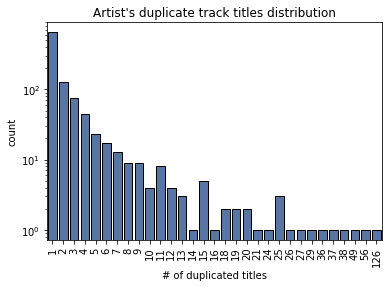

In [2156]:
artists = set()
duplicate_titles_for_same_artist = {}  # key=# duplicate tracks title, value=# artists
artist_ids = tracks[('artist', 'id')].unique()
for aid in artist_ids:
    tmp_list = tracks[(tracks[('artist', 'id')] == aid)][('track', 'title')].values
    # retrieving duplicate tracks' title in current album (if there are some)
    duplicate_titles = [item for item, count in Counter(tmp_list).items() if count > 1]
    key = len(set(duplicate_titles))
    if key > 0:
        try:
            count = duplicate_titles_for_same_artist[key]
            count += 1
            duplicate_titles_for_same_artist[key] = count
        except KeyError:
            duplicate_titles_for_same_artist[key] = 1
        artists.add(aid)
sorted_duplicate_titles_for_same_artist = dict(OrderedDict(sorted(duplicate_titles_for_same_artist.items())))
print(sorted_duplicate_titles_for_same_artist)
print("number of artists with at least one duplicate track in them", len(artists))
sns_barplot_x_and_y(sorted_duplicate_titles_for_same_artist, "# of duplicated titles", "Artist's duplicate track titles distribution", True, True)

**1020 artists have at least one duplicate title track**. Usually the number of duplicate songs is set to two. The exception is represented by the artist having ID 15891, which has a total of 745 tracks among which 126 duplicate tracks are present, displaying a different number of listens, favorites, interest, number and date_created. 

Finally, we notice that since the number of albums having duplicate track titles in them are less numerous than artists performing duplicate track titles, we can state how among artists' duplicate songs, these songs are present in different albums (since albums and artists are consistent in the dataset, we can approximate an album with its artist and viceversa).

{1: 202, 2: 11, 3: 2, 4: 2, 5: 4, 6: 3, 7: 1, 8: 1, 9: 1, 10: 1}
number of albums with at least one duplicate track in them 228


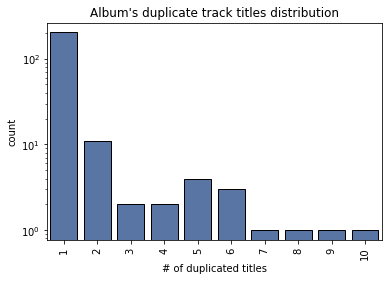

In [2157]:
duplicate_titles_in_same_album = {}  # key=# duplicate tracks title, value=# albums
album_ids = tracks[('album', 'id')].unique()
for aid in album_ids:
    tmp_list = tracks[(tracks[('album', 'id')] == aid)][('track', 'title')].values
    # retrieving duplicate tracks' title in current album (if there are some)
    duplicate_titles = [item for item, count in Counter(tmp_list).items() if count > 1]
    key = len(set(duplicate_titles))
    if key > 0:
        try:
            count = duplicate_titles_in_same_album[key]
            count += 1
            duplicate_titles_in_same_album[key] = count
        except KeyError:
            duplicate_titles_in_same_album[key] = 1
sorted_duplicate_titles_in_same_album = dict(OrderedDict(sorted(duplicate_titles_in_same_album.items())))
print(sorted_duplicate_titles_in_same_album)
print("number of albums with at least one duplicate track in them", sum(sorted_duplicate_titles_in_same_album.values()))
sns_barplot_x_and_y(sorted_duplicate_titles_in_same_album, "# of duplicated titles", "Album's duplicate track titles distribution", True, True)

**228 albums have at least one duplicate track's title in them**. The most redundant album is the one with ID 20280, which has a total of 24 tracks, each one present at least one other time in it and displaying a different number of listens, favorites, interest, number and date_created.

Most of the times, songs sharing the same title in the same album are two. For the tracks sharing the same title and album id and, as a consequence, artist id, we found that they actually are the same track, repeated multiple times in the same album (this is a quite strange behaviour that needs further investigation).

In [2158]:
# tracks[tracks[('track','title')] == "La Météo"].T

In [2159]:
# tracks[tracks[('track','title')] == "Mi Corazon Zone"].T

It seems the **tracks sharing the same album id, artist id and track title** differ only for track's metadata:
- date_created;
- duration;
- favorites;
- interest;
- listens;
- number.

In particulr having a different track number means that they belong to the same album, but in it they occupy a different track position. For this reason we can consider them as **not being duplicates**. Actually we can hypotize they are **extensions of tracks** itself (like addign a longuer intro, chorus or ending).

<h1> DataFrame's numerical statistics</h1>

In [2160]:
tracks.describe().T

count           mean            std         min  \
album  comments   106574.0       0.394946       2.268915   -1.000000   
       favorites  106574.0       1.286927       3.133035   -1.000000   
       id         106574.0   12826.933914    6290.261805   -1.000000   
       listens    106574.0   32120.306182  147853.178406   -1.000000   
       tracks     106574.0      19.721452      39.943673   -1.000000   
artist comments   106574.0       1.894702       6.297679   -1.000000   
       favorites  106574.0      30.041915     100.511408   -1.000000   
       id         106574.0   12036.770404    6881.420867    1.000000   
       latitude    44544.0      39.901626      18.240860  -45.878760   
       longitude   44544.0     -38.668642      65.237220 -157.526855   
track  bit_rate   106574.0  263274.695048   67623.443584   -1.000000   
       comments   106574.0       0.031621       0.321993    0.000000   
       duration   106574.0     277.849100     305.518553    0.000000   
       favorites  106574.0       3.182521      13.513820    0.000000   
       interest   106574.0    3541.310207   19017.430891    2.000000   
       listens    106574.0    2329.353548    8028.070647    0.000000   
       number     106574.0       8.260945      15.243271    0.000000   

                            25%            50%           75%           max  
album  comments        0.000000       0.000000       0.00000  5.300000e+01  
       favorites       0.000000       0.000000       1.00000  6.100000e+01  
       id           7793.000000   13374.000000   18203.00000  2.294000e+04  
       listens      3361.000000    8982.000000   23635.00000  3.564243e+06  
       tracks          7.000000      11.000000      17.00000  6.520000e+02  
artist comments        0.000000       0.000000       1.00000  7.900000e+01  
       favorites       1.000000       5.000000      16.00000  9.630000e+02  
       id           6443.000000   12029.500000   18011.00000  2.435700e+04  
       latitude       39.271398      41.387917      48.85693  6.728601e+01  
       longitude     -79.997459     -73.554431       4.35171  1.752770e+02  
track  bit_rate   192000.000000  299914.000000  320000.00000  4.480000e+05  
       comments        0.000000       0.000000       0.00000  3.700000e+01  
       duration      149.000000     216.000000     305.00000  1.835000e+04  
       favorites       0.000000       1.000000       3.00000  1.482000e+03  
       interest      599.000000    1314.000000    3059.00000  3.293557e+06  
       listens       292.000000     764.000000    2018.00000  5.432520e+05  
       number          2.000000       5.000000       9.00000  2.550000e+02

In [2161]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_tracks = tracks.select_dtypes(include=numerics)
numeric_tracks.shape

(106574, 17)

In [2162]:
for column_name in numeric_tracks.columns:
    minus_one_values = sum(numeric_tracks[column_name] == -1)
    if minus_one_values > 0:
        print(minus_one_values, column_name)

3529 ('album', 'comments')
3529 ('album', 'favorites')
1025 ('album', 'id')
3529 ('album', 'listens')
3529 ('album', 'tracks')
856 ('artist', 'comments')
856 ('artist', 'favorites')
105 ('track', 'bit_rate')


Regarding the numerical features, the dataset has:
- **62030 NaN records for ('artist', 'latitude')**;
- **62030 NaN records for ('artist', 'longitude')**.

In the Data Cleaning stage we will descarded the highly missing record columns.

We can notice some more **subtle missing values**, expressed as **-1**:
- 3529 ('album', 'comments');
- 3529 ('album', 'favorites');
- 1025 ('album', 'id');
- 3529 ('album', 'listens');
- 3529 ('album', 'tracks');
- 856 ('artist', 'comments');
- 856 ('artist', 'favorites');
- 105 ('track', 'bit_rate').

In [2163]:
def check_consistence_of_minus_one_attribute(minus_one_colum_name):
    if minus_one_colum_name[0] == "track":
        id_flag = 'title'
        ids_list = list(tracks[(tracks[minus_one_colum_name] == -1)][(minus_one_colum_name[0], 'title')])
        art_list = list(tracks[(tracks[minus_one_colum_name] == -1)][('artist', 'id')])
        alb_list = list(tracks[(tracks[minus_one_colum_name] == -1)][('album', 'id')])
        print(minus_one_colum_name)
        for adi, art, alb in zip(ids_list, art_list, alb_list):
            tmp_list = list(tracks[(tracks[(minus_one_colum_name[0], 'title')] == adi) & \
                                   (tracks[('artist', 'id')] == art) & \
                                   (tracks[('album', 'id')] == alb)
                                  ][minus_one_colum_name].unique())
            if len(tmp_list) > 1:
                print(adi, tmp_list)
    else:
        ids_list = list(tracks[(tracks[minus_one_colum_name] == -1)][(minus_one_colum_name[0], 'id')].unique())
        print(minus_one_colum_name)
        for adi in ids_list:
            tmp_list = list(tracks[(tracks[(minus_one_colum_name[0], 'id')] == adi)][minus_one_colum_name].unique())
            if len(tmp_list) > 1:
                print(adi, tmp_list)

In [2164]:
minus_ones_columns = [('album', 'comments'), ('album', 'favorites'), ('album', 'id'), ('album', 'listens'),
                      ('album', 'tracks'), ('artist', 'comments'), ('artist', 'favorites'), 
                      ('track', 'bit_rate')]
for column_name in minus_ones_columns:
    check_consistence_of_minus_one_attribute(column_name)

('album', 'comments')
('album', 'favorites')
('album', 'id')
('album', 'listens')
('album', 'tracks')
('artist', 'comments')
('artist', 'favorites')
('track', 'bit_rate')


Investigating, we found out that each album, artist and track having a -1 as numeric missing value is unique in its kind (it doesn't figure in the dataset with the same id/title and a value different than -1). 

In [2165]:
tracks[(tracks[('album', 'comments')] == -1) &
       (tracks[('album', 'favorites')] == -1) &
       (tracks[('album', 'id')] == -1) &
       (tracks[('album', 'listens')] == -1) &
       (tracks[('album', 'tracks')] == -1)].shape[0]

1025

In [2166]:
artist_ids = tracks[(tracks[('album', 'comments')] == -1) &
       (tracks[('album', 'favorites')] == -1) &
       (tracks[('album', 'id')] == -1) &
       (tracks[('album', 'listens')] == -1) &
       (tracks[('album', 'tracks')] == -1)][('artist', 'id')].values

We also find out that the 1025 albums without ids have also comments, favorites, listens and tracks set to -1, so we can hypotize they are part of track whose album information are missing (they don't belong to any known album).

1. <h6>Replacing -1 missing values with 0 </h6>

In [2167]:
imputing_columns = [('album', 'comments'), ('album', 'favorites'), ('album', 'listens'),
                    ('artist', 'comments'), ('artist', 'favorites')]
for column_name in imputing_columns: 
    tracks[column_name] = tracks[column_name].replace([-1], [0])
# checking
for column_name in imputing_columns: 
    print(column_name, tracks[tracks[column_name] == -1].shape[0])

('album', 'comments') 0
('album', 'favorites') 0
('album', 'listens') 0
('artist', 'comments') 0
('artist', 'favorites') 0


PREPROCESSING: set ('album', 'comments'), ('album', 'favorites'), ('album', 'listens'), ('artist', 'comments'), ('artist', 'favorites') to 0;

<h6>2. Imputing missing albums' id, using incrementally value greater than the greatest id prenset in the
('album', 'id') column</h6>

In [2168]:
max_album_id = tracks[('album', 'id')].max()
print("max_album_id", max_album_id)
missing_album_ids_indeces = tracks[tracks[('album', 'id')] == -1].index
i = max_album_id + 1
for idx in missing_album_ids_indeces:
    tracks.at[idx, ('album', 'id')] = i
    i += 1
# checking
print("('album', 'id')", tracks[tracks[('album', 'id')] == -1].shape[0])

max_album_id 22940
('album', 'id') 0


PREPROCESSING: craft new ids for ('album', 'id'), incrementally increasing the maximum album ID (22,940) present in the dataset;

<font color="fuchsia"><h6>3. ('album', 'tracks') constrain</h6> </font>
Every album must have a number of tracks >= associated number of tracks in the dataset.

In [2352]:
tracks_with_greater_freq = 0
count1 = 0
count2 = 0
count3 = 0
t = 0
m = 0
mm = 0
mmm = 0
for aid in tracks[('album', 'id')].unique():
    tracks_num_list = list(set(tracks[(tracks[('album', 'id')] == aid)][('album', 'tracks')]))
    if len(tracks_num_list) == 1:
        tracks_num = tracks_num_list[0]
    else:
        print("album with same id have different tracks number=%s" % aid)
        sys.exit(-1)
    album_freq = tracks[(tracks[('album', 'id')] == aid)].shape[0]
    if album_freq > tracks_num:
        if tracks_num not in [-1, 0, 1]:
            # print("album id=%s" % aid, "tracks=%s" % tracks_num, "freq=%s" % album_freq)
            t +=1
        if tracks[tracks[('album', 'id')] == aid][('track', 'number')].min() == 0:
            # print("album id=%s" % aid, "tracks=%s" % tracks_num, "freq=%s" % album_freq)
            m += 1
        # print("album id=%s" % aid, "tracks=%s" % tracks_num, "freq=%s" % album_freq)
        count1 += 1
        tracks_with_greater_freq += album_freq
    else:
        if tracks[tracks[('album', 'id')] == aid][('track', 'number')].max() == tracks_num:
            # print("album id=%s" % aid, "tracks=%s" % tracks_num, "freq=%s" % album_freq)
            count2 += 1
            
            if tracks[tracks[('album', 'id')] == aid][('track', 'number')].min() == 0:
                    # print("album id=%s" % aid, "tracks=%s" % tracks_num, "freq=%s" % album_freq)
                    mm += 1
        else:
            if tracks[tracks[('album', 'id')] == aid][('track', 'number')].min() == 0:
                # print("album id=%s" % aid, "tracks=%s" % tracks_num, "freq=%s" % album_freq)
                mmm += 1
            # print("album id=%s" % aid, "tracks=%s" % tracks_num, "freq=%s" % album_freq)
            count3 += 1
print("tot tracks with frequency gratear than tracks number=%s" % tracks_with_greater_freq)  
print("tot albums with frequency gratear than tracks number=%s" % count1)  
print("tot albums with frequency gratear than tracks number and (album, tracks) not \in [-1, 0, 1]=%s" % t)
print("tot albums with frequency gratear than tracks number and at least one (track, number)=0=%s" % m)
print("tot albums with all tracks in dataset=%s" % count2)
print("tot albums with all tracks in dataset and at least one (track, number)=0=%s" % mm)
print("tot albums with less than all tracks in dataset=%s" % count3)
print("tot albums with less than all tracks in dataset and at least one (track, number)=0=%s" % mmm)

tot tracks with frequency gratear than tracks number=4465
tot albums with frequency gratear than tracks number=1684
tot albums with frequency gratear than tracks number and (album, tracks) not \in [-1, 0, 1]=32
tot albums with frequency gratear than tracks number and at least one (track, number)=0=835
tot albums with all tracks in dataset=8864
tot albums with all tracks in dataset and at least one (track, number)=0=30
tot albums with less than all tracks in dataset=5330
tot albums with less than all tracks in dataset and at least one (track, number)=0=1680


In [2347]:
# missing ('album', 'tracks') values
n_miss = tracks[(tracks[('album', 'tracks')] == -1) | (tracks[('album', 'tracks')] == 0)].shape[0] 
perc = n_miss / tracks.shape[0] * 100
if n_miss > 0:
    print( '%s rows, %.1f%% of NaN rows for %s ' % (n_miss, perc,  ('album', 'tracks')))

4053 rows, 3.8% of NaN rows for ('album', 'tracks') 


In [2338]:
# missing ('track', 'number') values
n_miss = tracks[tracks[('track', 'number')] == 0].shape[0] 
perc = n_miss / tracks.shape[0] * 100
if n_miss > 0:
    print( '%s rows, %.1f%% of NaN rows for %s ' % (n_miss, perc, ('track', 'number')))

7894 rows, 7.4% of NaN rows for ('track', 'number') 


At first we thought that the column's meaning was associated with album's number of tracks (not necessarily present in the dataset). However, we discovered that:

- **8.864 albums** have all their tracks present in the dataset. However **30 tracks have a number equal to 0**, meaning that their position in the album is unknown. This is easily solved by assigning to track's number album's missing position in the range [1, ('album', 'tracks')];
- **1.684 albums** have the frequency in the dataset greater than their track number (<font color="red">Inconsistence</font>, 1.652 times due to -1, 0 and 1 values present in the ('album', 'tracks') column, 32 times due to greater ('track', 'number') values than ('album', 'tracks')). Here, again we have **835 tracks having a number equal to 0**, easily solved by assigning to track's number album's missing position in the range [1, ('album', 'tracks')] and for the **32 cases by upgrading ('album', 'tracks') to tracks frequency in the dataset**;
- **5.330 albums** have the frequency lower than their track number. This for 3.650 times is a consistent phenomenon, in the sense that the dataset doesn't show all album's tracks, in 1.680 cases, instead, we detected **1680 tracks having ('track', 'number') = 0**, meaning that their position in the album is unknown.

In particulat, the third bulletpoint makes the column ('album', 'tracks') less consistent in its semantic, because even if we decide to imput the 1680 ('track', 'number') missing values with a random position between [1, ('album', 'tracks')], we will, however, have the first two cases which take into account the frequency of each album's tracks in the dataset in the ('album', 'tracks') column, while the last one takes into account albums' real number of tracks (not necessarily all present in the dataset). 

PREPROCESSING: for consistency reasons and for not modifying the ('artist', 'tracks') column, solving the 29.222 tracks having a frequency greater than the actual ('artist', 'tracks') (27.4% of rows), we discarded ('album', 'tracks') column.
We get rid of ('track', 'number column'), too, being moderate correlated with it (+0.53).

<h6>4. Imputating ('track', 'bit_rate') </h6> 

Imputation idea:

- **Hyphotesis 1: usually artists perform songs quite similar in the same album**:
    Usually an artist performs a narrow set of musical genres in the same album. So, if a given artist has two  songs belonging to the same genre_top, in the same album, the first having a known bit_rate, the second a bit_rate set to -1, we can quite confidently substitue the missing value with the first bit_rate;

- **Hyphotesis 2: usually artists perform songs quite similar among them**:
  Usually an artist performs a narrow set of musical genres. So, if a given artist has two songs belonging to the   same genre_top, the first having a known bit_rate, the second a bit_rate set to -1, we can quite confidently     substitue the missing value with the first bit_rate;

In [2170]:
missing_bit_rate_ids = list(tracks[tracks[('track', 'bit_rate')] == -1].index)
missing_bit_rate_artists = tracks[tracks[('track', 'bit_rate')] == -1][('artist', 'id')]
missing_bit_rate_albums = tracks[tracks[('track', 'bit_rate')] == -1][('album', 'id')]

print("num artists with missing bit_rate", len(set(missing_bit_rate_artists)))
print("num albums with missing bit_rate", len(set(missing_bit_rate_albums)))

num artists with missing bit_rate 33
num albums with missing bit_rate 31


In [2171]:
# bit_rate imputation based upon same genre_top tracks present in same album
imputed = 0
albums = set()
impunted_artists_ids = set()
for idx in missing_bit_rate_ids:
    album_id = tracks.at[idx, ('album', 'id')]
    artist_id = tracks.at[idx, ('artist', 'id')]
    genre_top = tracks.at[idx, ('track', 'genre_top')]
    album_bit_rate = tracks[(tracks[('album', 'id')] == album_id) & (tracks[('track', 'genre_top')] == genre_top)][('track', 'bit_rate')].values
    artist_bit_rate = tracks[(tracks[('artist', 'id')] == artist_id) & (tracks[('track', 'genre_top')] == genre_top)][('track', 'bit_rate')].values
    if album_id not in albums:
        albums.add(album_id)
        if len(set(album_bit_rate)) == 2: # bit_rate's value \in [-1, bit_rate_to_use]
            # print("bit_rate_for_genre_top=%s" % str(set(album_bit_rate)), "genre_top=%s" % genre_top, "album_id=%s" % album_id, "artist_id=%s" % artist_id)
            impunted_artists_ids.add(artist_id)
            tmp_dict = Counter(album_bit_rate)
            imputed += tmp_dict[-1]
        elif len(set(album_bit_rate)) > 2: # bit_rate's value \in [-1, tie1, tie2] 
            # imputation done using greatest tie value's frequency
            tmp_dict = Counter(album_bit_rate)
            print(tmp_dict, album_bit_rate)
        # else:  # doesn't exist in the album a track having same genre_top or all same genre_top tracks have bit_rate = -1  
# print("impunted=%s" % imputed)
# print("impunted_artists_ids=%s" % len(impunted_artists_ids))

In [2172]:
# bit_rate imputation based upon same genre_top tracks of the same artist
artists = set()
for idx in missing_bit_rate_ids:
    album_id = tracks.at[idx, ('album', 'id')]
    artist_id = tracks.at[idx, ('artist', 'id')]
    genre_top = tracks.at[idx, ('track', 'genre_top')]
    album_bit_rate = tracks[(tracks[('album', 'id')] == album_id) & (tracks[('track', 'genre_top')] == genre_top)][('track', 'bit_rate')].values
    artist_bit_rate = tracks[(tracks[('artist', 'id')] == artist_id) & (tracks[('track', 'genre_top')] == genre_top)][('track', 'bit_rate')].values
    if artist_id not in artists:
        artists.add(artist_id)
        if len(set(artist_bit_rate)) == 2:
            # print("bit_rate_for_genre_top=%s" % str(set(artist_bit_rate)), "genre_top=%s" % genre_top, "artist_id=%s" % artist_id)
            impunted_artists_ids.add(artist_id)
            tmp_dict = Counter(artist_bit_rate)
            imputed += tmp_dict[-1]
        elif len(set(album_bit_rate)) > 2: 
            tmp_dict = Counter(album_bit_rate)
            print(tmp_dict, album_bit_rate)
print("impunted=%s" % imputed)
print("impunted_artists_ids=%s" % len(impunted_artists_ids))
print("missing_artists_ids=%s" % len(set(missing_bit_rate_artists).difference(set(impunted_artists_ids))))

impunted=14
impunted_artists_ids=8
missing_artists_ids=25


We can impute ('track', 'bit_rate')=-1 with:
- bit_rate_for_genre_top={256000, -1} genre_top=Experimental artist_id=2760
- bit_rate_for_genre_top={320000, -1} genre_top=Electronic artist_id=4136
- bit_rate_for_genre_top={192000, -1} genre_top=International artist_id=4621
- bit_rate_for_genre_top={192000, -1} genre_top=Electronic artist_id=4836
- bit_rate_for_genre_top={192000, -1} genre_top=Electronic artist_id=4835
- bit_rate_for_genre_top={256000, -1} genre_top=Electronic artist_id=3212
- bit_rate_for_genre_top={160000, -1} genre_top=Rock artist_id=8583

Using this criterion we impute 14 missing bit_rates associated with 8 artists.

However, still remains many missing bit_rates associated with 25 artists, among which many have at least one track with genre_top set to NaN, while the other show a tie bit_rate for the same genre_top.

In any case, untill genre_top is not imputed, we can't further proceed, since after the imputation the artists with a missing genre_top, may solve by yourself the bit_rate imputation, revealing other matching tracks (or just a single genre_top track can be used to impute the bit_rate). 
Genre_top imputation could solve our ties, too, since among the artists involved in the ties, we can found artist with missing genre_top, too (the imputation is done using greatest tie value's frequency).

PREPROCESSING: first perform ('track', 'genre_top') imputation to unveil which bit_rate to use to substitute this other missing value,  the approximate ('track', 'bit_rate') by other tracks' matching genre_top, artist/album bit_rate.

<h6>Checking other numerical constrains</h6>

<font color="fuchsia"><h6>('album', 'listens') constrains</h6></font>
Constrains:
1. ('album', 'listens') >= sum{('track', 'listens')}

TODO: not sure if this constrain must have this semantic (probably each track's playcount is counted among different album's version, while the current album present in the database shows only the metadata of tracks it officially had when collected).

In [2394]:
def check_constrained_columns(column_name1, column_name2):
    id_flag = 'id'
    if column_name1[0] == 'track':
        id_flag = 'title'
    lower = tracks[((tracks[column_name1]) < (tracks[column_name2]))].shape[0]
    greater = tracks[((tracks[column_name1]) > (tracks[column_name2]))].shape[0]
    
    print("%s < %s=%s" % (column_name1, column_name2, lower))
    print("%s > %s=%s" % (column_name1, column_name2, greater))

In [2415]:
count = 0
for aid in tracks[('album', 'id')].unique():
    to_compare = tracks[tracks[('album', 'id')] == aid][('album', 'listens')].values[0]
    tmp_sum = tracks[tracks[('album', 'id')] == aid][('track', 'listens')].sum()
    if to_compare >= tmp_sum:
        count += 1
count

2973

In [2395]:
check_constrained_columns(('album', 'listens'), ('track', 'listens'))

('album', 'listens') < ('track', 'listens')=4980
('album', 'listens') > ('track', 'listens')=100616


In [2386]:
len(tracks[tracks[('album', 'listens')] == 0][('album', 'id')].unique())

1483

PREPROCESSING: We expected that ('album', 'listens') gathered together dataset's tracks' listens sum, adding to the counting also the tracks not present in the dataset. However, we actually found out than only 18.72% of albums shared this characteristic.

This means that ('album', 'listens') and ('track', 'listens') assume a different semantic, in the sense they both are releated to album's and track's popularity, but the two likeness aren't correlated. In most cases, ('album', 'listens') is greater or equal to a single ('track', 'listens'), but exist 4.980 tracks representing an excpetion and having a listen number greater than their actual album's listen number.

For the reasons mentioned above, we will disregard ('album', 'listens'), prefering to use some other feature to detect albums' audience satisfaction.

<h6>Checking ('album', 'comments'), ('artist', 'comments') and ('track', 'comments') asymmetry</h6>

In [2430]:
count = 0
for aid in tracks[('artist', 'id')].unique():
    to_compare = tracks[tracks[('artist', 'id')] == aid][('artist', 'comments')].values[0]
    tmp_sum = 0
    for aid2 in tracks[tracks[('artist', 'id')] == aid][('album', 'id')].unique():
        tmp_sum += tracks[tracks[('album', 'id')] == aid2][('album', 'comments')].values[0]
    if to_compare >= tmp_sum:
        count += 1
count

12684

In [2417]:
count = 0
for aid in tracks[('album', 'id')].unique():
    to_compare = tracks[tracks[('album', 'id')] == aid][('album', 'comments')].values[0]
    tmp_sum = tracks[tracks[('album', 'id')] == aid][('track', 'comments')].sum()
    if to_compare >= tmp_sum:
        count += 1
count

14728

77.62% of artists and 92.76% of albums have a number of comments greater than their relative albums' and tracks' comments. This means that if usually an artist is popular, he has received a greater number of reviews than its albums. Since this reasoning is true for albums and tracks, he has receive a greater number of comments than its tracks, too.

So we can state that the comments features are in the majority of cases incrementally among them. 

PREPROCESSING: However, since a comment can have a positive or negative meaning, we prefer to disregard commen features as audiance' satisfaction towars an album/artist/track, since sometimes this can be misleading. Better take into account the favorites features, which always convay a positive reference. 

<h6>Checking ('album', 'favorites'), ('artist', 'favorites') and ('track', 'favorites') asymmetry</h6>

In [2419]:
count = 0
for aid in tracks[('artist', 'id')].unique():
    to_compare = tracks[tracks[('artist', 'id')] == aid][('artist', 'favorites')].values[0]
    tmp_sum = tracks[tracks[('artist', 'id')] == aid][('album', 'favorites')].sum()
    if to_compare >= tmp_sum:
        count += 1
count

8462

In [2420]:
count = 0
for aid in tracks[('album', 'id')].unique():
    to_compare = tracks[tracks[('album', 'id')] == aid][('album', 'favorites')].values[0]
    tmp_sum = tracks[tracks[('album', 'id')] == aid][('track', 'favorites')].sum()
    if to_compare >= tmp_sum:
        count += 1
count

2182

51.78% of albums and 13.74% of albums have a number of favorites greater than their relative albums' and tracks' favorites. This underlines how the favorites' features are asymmetric/not-related between albums, artists and tracks.

<b><font color="green">
RECAP: To detect audience's satisfaction we will consider ('album', 'favorites'), ('artist', 'favorites'), ('track', 'listens') and ('track', 'favorites').
Since albums', artists' and tracks' favorites features can be asymmetric, these three columns don't have to complay to any constain.
</font></b>

<h6>Checking other numerical missing values</h6>

In [2173]:
def print_perc_missing_values(df):
    for column_name in df.columns:
        # count number of rows with missing values
        data = df[column_name]
        n_miss = data.isnull().sum()
        perc = n_miss / df.shape[0] * 100
        if n_miss > 0:
            print( '%s, Missing: %d (%.1f%% of rows) ' % (column_name, n_miss, perc))

In [2174]:
print_perc_missing_values(numeric_tracks)

('artist', 'latitude'), Missing: 62030 (58.2% of rows) 
('artist', 'longitude'), Missing: 62030 (58.2% of rows) 


In [2175]:
# longitude is symmetric 
geo_missing_location = tracks[tracks[('artist', 'latitude')].isna()][('artist', 'location')].unique()
print("locations' missing latitude&longitude", len(geo_missing_location))

locations' missing latitude&longitude 1046


In [2176]:
tmp_map = {}
for loc in geo_missing_location:
    tmp_df = tracks[tracks[('artist', 'location')] == loc][[('artist', 'latitude'), ('artist', 'longitude')]]
    if tmp_df.shape[0] > 1:
        for row in tmp_df.itertuples():
            if str(row[1]) != "nan" and str(row[2]) != "nan":
                tmp_map[str(loc)] = (row[1], row[2])
                break
print("imputable locations' latitude&longitude", len(tmp_map))

imputable locations' latitude&longitude 324


In [2177]:
geo_imputed_rows = 0
for loc in tmp_map.keys():
    tmp = tracks[(tracks[('artist', 'location')] == loc) & (tracks[('artist', 'latitude')].isna())].shape[0]
    geo_imputed_rows += tmp
print("missing values after imputation", "(%.1f%% of rows)" % ((62030 - geo_imputed_rows) / tracks.shape[0] * 100))

missing values after imputation (43.4% of rows)


Among the 58.2% missing latitudes/longitudes, we can decrease the number of missing values to 43.4% , but not actually remove all the missing values. We can try to guess the missing latitude and longitude by cleaning and pimputing ('artist', 'location').

<font color="light blue"><h6>Cleaning ('artist', 'location') column </h6></font>

('artist', 'location') has 2330 unique values, but they are highly uneven in the namings. For this reason, after a firts attemp to clean them (reaching x unique values) and taking into account that for a classification genre maybe is more important the language than interpreter's location, we stop the cleaning phase and simply **won't use ('artist', 'location'), ('artist', 'latitude') and ('artist', 'longitude) columns.

In [2178]:
df_copy = tracks.copy()
location_column = df_copy[('artist', 'location')].values
print("unique locations", len(set(location_column)))

unique locations 2330


In [2179]:
countries = pd.read_csv('../../data/fma_metadata/countries.csv', sep=",")
countries.shape

(249, 2)

In [2180]:
def clean_code(code):
    code =  code.replace(" ", "")
    code =  code.replace(".", "")
    code =  code.replace("\n", "")
    code =  code.upper()
    return code

In [2181]:
codes = {'USA': "United States", 
         'UK': "United Kingdom", 
         'NYC': "United States",
         'NY': "United States", 
         'OR': "United States",
         'OH': "United States",
         'NJ': "United States", 
         'MI': "United States",
         'VT': "United States",
         'TX': "United States",
         'DC': "United States",
         'WI': "United States",
         'CT': "United States",
         'RI': "United States",
         'WA': "United States",
         'FL': "United States",
         'OK': "United States",
         'KS': "United States",
         'NH': "United States",
         'NV': "United States",
         'BC': "United States",
         'ND': "United States",
         'OW': "Canada",
         'ON': "Canada",
         'QC': "Canada",
         'PQ': "Canada",
         'CAN': "Canada",
         'ONT': "Canada",
         'NSW': "Australia",
         'DF': "Mexico", 
         'GO': "Brazil"
        }
names = {"Alaska": "United States",
         "Hawaii": "United States",
         "Copenhagen": "Denmark",
         "Aarhus": "Denmark",
         "Memphis": "United States",
         "Asheville": "United States",
         "Nashville": "United States",
         "Queens":  "United States",
         "Brooklyn":  "United States",
         "Colombia ":  "United States",
         "NewJersey":  "United States",
         "WashingtonDc":  "United States",
         "Washington":  "United States",
         "Toronto": "Canada",
         "Montreal": "Canada",
         "Podolsk": "Russia",
         "Jersey City ":  "United States",
         "Jersey City":  "United States",
         "Union City":  "United States",
         "Baltimore": "United States",
         "San Francisco": "United States",
         "Boston":  "United States",
         "Newcastle": "United Kingdom",
         "Bournemouth": "United Kingdom",
         "Brighton": "United Kingdom",
         "York": "United Kingdom",
         "Kisumu": "Kenya",
         "Nairobi": "Kenya",
         "Orlando": "United States",
         "Missouri": "United States",
         "Oklahoma": "United States",
         "America": "United States",
        }
codes_not_mapped = ['ETC', 'N16']

location_missing_values = ["Nan", "Unknown", "Leechrum", "Https:", "@Gmail"]  # N.B.: capitalized values

# investifating names after comma
for loc in set(location_column):
    tmp_list = str(loc).split(",")
    if len(tmp_list) == 1:  # one location name
        curr_location = tmp_list[0]
        curr_location = curr_location.title()
        curr_location = curr_location.replace("\n", "")
        if curr_location in location_missing_values:
            continue
        if "/" in curr_location:
            tmp = curr_location.split("/")
            if len(tmp[1]) == 2 or len(tmp[1]) == 3:
                tmp[1] =  clean_code(tmp[1])
                tmp_df = countries[countries['Code'] == tmp[1]]
                if tmp_df.shape[0] > 0:  # matching code's country name
                    # print(tmp_df["Name"].values[0])
                    pass
                else:
                    # print(codes[tmp[1]])
                    pass
            else:
                l_values = set()
                for l in tmp:
                    l = l.replace(" ", "")
                    tmp_df = countries[countries['Name'] == l]
                    if tmp_df.shape[0] > 0:
                        l_values.add(tmp_df["Name"].values[0])
                    try:
                         l_values.add(names[l])
                    except KeyError:
                        continue
                if len(l_values) != 1:
                    langs = tracks[tracks[('artist', 'location')] == curr_location][('track', 'language_code')].unique()
                    if len(langs) > 0:
                        langs = [str(x) for x in langs]
                        # TODO: in the dataset all of this have actually missing location
                        if len(langs) > 1:
                            # print("*" + tmp[0] + "*", tmp[1], langs)
                            pass
                        else:  # "nan" or univocal language
                            if "nan" in langs:
                                # print("*" + tmp[0] + "*", tmp[1], langs)
                                pass
                            else:
                                # print("*" + tmp[0] + "*", tmp[1], langs)
                                pass
                
        else:
            tmp_df = countries[countries['Name'] == curr_location]
            if tmp_df.shape[0] > 0:
                # print(tmp_df["Name"].values[0])
                pass
            else:
                if curr_location not in names:
                    pass
                    # print("*" + curr_location + "*")
    elif len(tmp_list) == 2: # two location name
        tmp_list[1] =  clean_code(tmp_list[1])
        if len(tmp_list[1]) == 2 or len(tmp_list[1]) == 3:
            tmp_df = countries[countries['Code'] == tmp_list[1]]
            if tmp_df.shape[0] > 0:  # matching code's country name
                # print(tmp_df["Name"].values[0])
                pass
            else:  # self-matching code's country name
                # codes_not_mapped.add(tmp_list[1])
                # if tmp_list[1] in codes_not_mapped:
                # print(tmp_list[0], "*" + tmp_list[1] + "*")
                pass
        else:
            # print("country", tmp_list[1])
            pass
    elif len(tmp_list) > 2: # more than two locations name
        pass
    # else:
    # print(tmp_list)

In [2182]:
# missing geographical and language info
tracks[(tracks['artist', 'location'].isna()) &
       (tracks['artist', 'latitude'].isna()) &
       (tracks['artist', 'longitude'].isna()) &
       (tracks['track', 'language_code'].isna())].shape[0]

30346

In [2183]:
# artists with missing geographical and language info
len(tracks[(tracks['artist', 'location'].isna()) &
       (tracks['artist', 'latitude'].isna()) &
       (tracks['artist', 'longitude'].isna()) &
       (tracks['track', 'language_code'].isna())][('artist', 'id')].unique())

8796

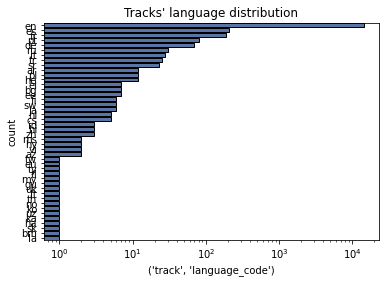

In [2184]:
column_name = ('track', 'language_code')
sns_barplot(tracks, column_name, str(column_name), False, True, "Tracks' language distribution")

In [2185]:
print("non-empty language_code", tracks[~(tracks[('track', 'language_code')].isna())].shape[0])
print("language_code=en", tracks[(tracks[('track', 'language_code')] == "en")].shape[0])

non-empty language_code 15024
language_code=en 14255


In the ('artist', 'location') phase, disregarding most of the uneven locations and the 36.364 NaN values (34.1% of rows), the number of missing values raise further, due to many location's names which haven't a geographical meaning. In addition, 8.796 arists related to 30.366 tracks (28.47% of rows) haven't associated informations in ('artist', 'location'), ('artist', 'latitude'), ('artist', 'longitude') and ('track', 'language_code') columns, so we haven't any clue with which to substitue the relative missing location and language. 

We could, for example, opt to impute tracks' missing language with ('track', 'language_code')'s mode, but this solution will lead to a low-variance feature predictor (a colum displaying almost all the time "en" value and so become usless for our genre_top classification goal), since:

- ('track', 'language_code') is an highly empty column (85.9% of rows have NaN values);
- ('track', 'language_code') presents an highly inbalanced predominance of english (**94.88% of non empty language_code's rows are set to "en"**). 


PREPROCESSING: For all the reasons mentioned above, **we discard ('artist', 'location'), ('artist', 'latitude'), ('artist', 'longitude') and ('track', 'language_code') as having to many missing values, as well as having an highly predominance of english language and English-speaking countries, thus leadig to poor discriminating feature set for our genre_top classification goal.** 

<b><font color="green">
We discovered that ('album', 'tracks') and the correlated ('track', 'number') is a biased colum, while we dected many missing values in ('artist', 'latitude'), ('artist', 'longitude') and ('track', 'language_code') columns, which aren't possible to solve due to many not geographical entries in the ('artist', 'location') column.
We will remove all these 6 column.
</font></b>

<h1>Categorical features insight</h1>

In [2186]:
tracks.describe(include='object').T

count unique  \
album  date_created       103045  14340   
       date_released       70294   3669   
       engineer            15295    622   
       information         83149  11075   
       producer            18060    760   
       tags               106574   2388   
       title              105549  14298   
       type               100066      5   
artist active_year_begin   22711     76   
       active_year_end      5375     57   
       associated_labels   14271    754   
       bio                 71156   6084   
       date_created       105718  15970   
       location            70210   2329   
       members             46849   4015   
       name               106574  16294   
       related_projects    13152    752   
       tags               106574  15660   
       website             79256   6642   
       wikipedia_page       5581    389   
set    split              106574      3   
       subset             106574      3   
track  composer             3670    505   
       date_created       106574  86169   
       date_recorded        6159    773   
       genre_top           49598     16   
       genres             106574   4768   
       genres_all         106574   4151   
       information          2349   1586   
       language_code       15024     44   
       license            106487    113   
       lyricist              311     66   
       publisher            1263    135   
       tags               106574   2451   
       title              106573  94986   

                                                                        top  \
album  date_created                                     2015-01-26 13:04:57   
       date_released                                    2008-01-01 00:00:00   
       engineer                                              Ernie Indradat   
       information        <p class="p1" style="margin: 0px; padding: 8px...   
       producer                                                  Joe Belock   
       tags                                                              []   
       title                                              microSong Entries   
       type                                                           Album   
artist active_year_begin                                2007-01-01 00:00:00   
       active_year_end                                  2016-01-01 00:00:00   
       associated_labels                                       HUSH Records   
       bio                <p><span style="color: #333333; font-family: G...   
       date_created                                     2013-03-31 02:17:41   
       location                                                Brooklyn, NY   
       members                                            Konstantin Trokay   
       name                                                         Kosta T   
       related_projects   Ratatat, Lullatone, Nightmares On Wax, Air, Mo...   
       tags                                                              []   
       website                     https://soundcloud.com/konstantin-trokay   
       wikipedia_page            http://en.wikipedia.org/wiki/Josh_Woodward   
set    split                                                       training   
       subset                                                         large   
track  composer                                           konstantin trokai   
       date_created                                     2009-04-20 22:30:54   
       date_recorded                                    2008-11-26 00:00:00   
       genre_top                                                       Rock   
       genres                                                          [21]   
       genres_all                                                      [21]   
       information        <p><a href="http://www.myspace.com/theshambler...   
       language_code                                                     en   
       license            Att

In [2187]:
categorical_tracks = tracks.select_dtypes('object')
categorical_tracks.shape

(106574, 35)

In [2188]:
for column_name in categorical_tracks.columns:
    # count number of rows with missing values
    data = categorical_tracks[column_name]
    n_miss = data.isnull().sum()
    perc = n_miss / categorical_tracks.shape[0] * 100
    if n_miss > 0:
        #print( '%.1f%% of NaN rows for %s ' % (perc, column_name))
        pass

Regarding the categorical features, the dataset has:

- 3.3% of NaN rows for ('album', 'date_created') 
- 34.0% of NaN rows for ('album', 'date_released') 
- **85.6% of NaN rows for ('album', 'engineer')**
- 22.0% of NaN rows for ('album', 'information') 
- **83.1% of NaN rows for ('album', 'producer')**
- 1.0% of NaN rows for ('album', 'title') 
- 6.1% of NaN rows for ('album', 'type') 
- **78.7% of NaN rows for ('artist', 'active_year_begin')** 
- **95.0% of NaN rows for ('artist', 'active_year_end')** 
- **86.6% of NaN rows for ('artist', 'associated_labels')** 
- 33.2% of NaN rows for ('artist', 'bio') 
- 0.8% of NaN rows for ('artist', 'date_created') 
- 34.1% of NaN rows for ('artist', 'location') 
- 56.0% of NaN rows for ('artist', 'members') 
- **87.7% of NaN rows for ('artist', 'related_projects')** 
- 25.6% of NaN rows for ('artist', 'website') 
- **94.8% of NaN rows for ('artist', 'wikipedia_page')** 
- **96.6% of NaN rows for ('track', 'composer')** 
- **94.2% of NaN rows for ('track', 'date_recorded')** 
- 53.5% of NaN rows for ('track', 'genre_top') 
- **97.8% of NaN rows for ('track', 'information')** 
- **85.9% of NaN rows for ('track', 'language_code')** 
- 0.1% of NaN rows for ('track', 'license') 
- **99.7% of NaN rows for ('track', 'lyricist')** 
- **98.8% of NaN rows for ('track', 'publisher')** 
- 0.0% of NaN rows for ('track', 'title') 

PREPROCESSING: In the Data Cleaning stage we will descarded the highly missing record columns (the bold above).

<font color="fuchsia"><h6>('album', 'date_created') and ('album', 'date_released') constrains </h6></font>
Constrains:

1. ('album', 'date_created') >=  ('artist', 'active_year_begin')
2. ('album', 'date_released') >=  ('artist', 'active_year_begin')
3. ('album', 'date_created') <= ('track', 'date_recorded'),  with track belonging to album
4. ('album', 'date_released') <= ('track', 'date_recorded'),  with track belonging to album

The first two constrains impose that in order to create/release an album the artist must been active. The third and fourth constrains impose that when an album is created/released its tracks are known and so already recorded.

N.B.: an album can be created before or after ('artist', 'active_year_end') (i.e. ussually after an artist passed away a memorial album is created/released). 

N.B.B.: hypotizing a different album, artist and track time profiling on Echonest ('album', 'date_created'), ('album', 'date_released'), ('artist', 'date_created') and ('track', 'date_created') are unconstrained among them (i.e. metadata added to Echonest before album/artist/track's actual creation/release or most of tghe times happens that a tracks is first released and its album and artist data is added).

PREPROCESSING: artists with NaT in the ('artist', 'active_year_end') column, display this value probably beacause they are not yet death, but since 95.0% of rows share this characteristic, imputing it will lead to a zero-variance column. **So we will discard ('artist', 'active_year_end') column**. In addition, we will probably **omit ('artist', 'active_year_begin') column, too, due too many missing values**.

In [2189]:
def check_date_values(column_name1, column_name2):
    id_flag = 'id'
    if column_name1[0] == 'track':
        id_flag = 'title'
    lower = len(tracks[((tracks[column_name1]) < (tracks[column_name2])) & 
                      (tracks[column_name1] != np.datetime64('NaT') ) & 
                      (tracks[column_name2] != np.datetime64('NaT') )
                      ][(column_name1[0], id_flag)].unique())
    greater = len(tracks[((tracks[column_name1]) > (tracks[column_name2])) & 
                       (tracks[column_name1] != np.datetime64('NaT') ) &
                       (tracks[column_name2] != np.datetime64('NaT') )
                       ][(column_name1[0], id_flag)].unique())
    
    print("%s < %s=%s" % (column_name1, column_name2, lower))
    print("%s > %s=%s" % (column_name1, column_name2, greater))


In [2190]:
check_date_values(('album', 'date_created'), ('artist', 'active_year_begin'))
print()
check_date_values(('album', 'date_released'), ('artist', 'active_year_begin'))

('album', 'date_created') < ('artist', 'active_year_begin')=0
('album', 'date_created') > ('artist', 'active_year_begin')=3551

('album', 'date_released') < ('artist', 'active_year_begin')=6
('album', 'date_released') > ('artist', 'active_year_begin')=2310


All albums' creation on Echonest are consistent with artists' career beginning.
**6 albums are biased due to their releasing before artists' career beginning**. We can hypotize that ('album', 'date_released') is a biased column, but further investigation is needed, since due to many missing values ('artist', 'active_year_begin') may be discarded.

In [2191]:
check_date_values(('album', 'date_created'), ('track', 'date_recorded'))
print()
check_date_values(('album', 'date_released'), ('track', 'date_recorded'))

('album', 'date_created') < ('track', 'date_recorded')=68
('album', 'date_created') > ('track', 'date_recorded')=1135

('album', 'date_released') < ('track', 'date_recorded')=151
('album', 'date_released') > ('track', 'date_recorded')=427


**68 albums have ('album', 'date_created') previous ('track', 'date_recorded') ** and **151 albums have ('album', 'date_released') previous ('track', 'date_recorded')'**. We can hypotize that ('track', 'date_recorded') is a biased column, but further investigation is needed.

<font color="fuchsia"><h6>('artist', 'active_year_begin'), ('artist', 'active_year_end') and ('artist', 'created')  constrains</h6></font>
We have already verified that ('album', 'date_created') is consistent with ('artist', 'active_year_begin'), as well as finding 6 albums having ('album', 'date_released') previous than ('artist', 'active_year_begin').

As already stated, too, ('artist', 'active_year_end') doesn't impose constains upon album and tracks creations, since after an artist's death is quite frequent to release new albums and songs.

Constrains:
1. ('artist', 'active_year_begin') <= ('artist', 'active_year_end')
1. ('artist', 'active_year_begin') <= ('artist', 'date_created')
3. ('artist', 'active_year_begin') <= ('track', 'date_created')
4. ('artist', 'active_year_begin') <= ('track', 'date_recorded')

In [2192]:
check_date_values(('artist', 'active_year_begin'), ('artist', 'active_year_end'))

('artist', 'active_year_begin') < ('artist', 'active_year_end')=269
('artist', 'active_year_begin') > ('artist', 'active_year_end')=0


All artists' withdrawal from the scene are consistent with their career beginning.

In [2193]:
check_date_values(('artist', 'active_year_begin'), ('artist', 'date_created'))

('artist', 'active_year_begin') < ('artist', 'date_created')=1254
('artist', 'active_year_begin') > ('artist', 'date_created')=0


All artists present on Echonest were created before their career beginning.

In [2194]:
check_date_values(('artist', 'active_year_begin'), ('track', 'date_created'))
print()
check_date_values(('artist', 'active_year_begin'), ('track', 'date_recorded'))

('artist', 'active_year_begin') < ('track', 'date_created')=1254
('artist', 'active_year_begin') > ('track', 'date_created')=0

('artist', 'active_year_begin') < ('track', 'date_recorded')=304
('artist', 'active_year_begin') > ('track', 'date_recorded')=3


**3 artists display an ('artist', 'active_year_end') posterior to ('track', 'date_recorded')**. On the contrary, all tracks created on Echonest are consistent with artist's career beginning. Our biased hypotetisis upon 'track', 'date_recorded') in enforced.

<font color="fuchsia"><h6>('track', 'date_created') and ('track', 'date_recorded') constrains </h6></font>
We already discovered that ('track', 'date_recorded') is incosistent with ('album', 'date_created'), ('album', 'date', 'release') [in turn inconsistent with ('artist', 'active_year_begin')] and ('artist', 'active_year_begin').

Constrains:
1. ('track', 'date_created') > ('track', 'date_recorded')

In [2195]:
check_date_values(('track', 'date_created'), ('track', 'date_recorded'))

('track', 'date_created') < ('track', 'date_recorded')=306
('track', 'date_created') > ('track', 'date_recorded')=5409


**306 tracks have ('track', 'date_created') previous ('track', 'date_recorded')**. 

PREPROCESSING: Since ('track', 'date_recorded') presented inconsistences also with ('album', 'date_created'),  ('album', 'date_released'), ('artist', 'active_year_begin'), ('track', 'date_created') and have 94.2% of NaN rows,  we confirm its inconsistence and so removal.

<b><font color="green">
RECAP: ('track', 'date_recorded') is a biased column and so we won't use it. We will omitt ('artist', "active_year_begin") and ('artist', 'active_year_end'), too, due too many missing values. We are still in doubt if keeping ('album', 'date_released') and in genereal the other date_created columns, since maybe exists some correlation among them.
</font></b>

<h6>Trasforming datetime columns</h6>

In [2196]:
# converting columns relative to dates to datetime64[ns] type
dates_columns = [('album', 'date_created'), ('album', 'date_released'), ('artist', 'active_year_begin'), 
                 ('artist', 'active_year_end'), ('artist', 'date_created'), ('track', 'date_created'),
                 ('track', 'date_recorded')]
for dcolumn in dates_columns:
    tracks[dcolumn] = pd.to_datetime(tracks[dcolumn], infer_datetime_format=True)

In [2197]:
datetime_tracks = tracks.select_dtypes('datetime64')
datetime_tracks.shape

(106574, 7)

In [2198]:
def support_transform_column_in_years_and_months(df, column_name):
    years_column = []
    months_colum = []
    for row in df[column_name]:
        years_column.append(row.year)
        months_colum.append(row.month)
    if len(years_column) != df.shape[0] or len(months_colum) != df.shape[0]:
        print("not matching column's length")
    return years_column, months_colum

In [2199]:
# splitting datetime64[ns] into year and month
original_datetime_column = list(datetime_tracks.columns)
for column_name in original_datetime_column:
    years_column, months_column  = transform_column_in_years_and_months(datetime_tracks, column_name)
    column_index = datetime_tracks.columns.get_loc(column_name)
    new_years_column_name = (column_name[0], column_name[1] + "_year")
    new_months_column_name = (column_name[0], column_name[1] + "_month")
    datetime_tracks.insert(loc=column_index, column=new_years_column_name, value=years_column)
    datetime_tracks.insert(loc=column_index+1, column=new_months_column_name, value=months_column)
    
# drop old datetime64[ns] columns
for column_name in original_datetime_column:
    del datetime_tracks[column_name]
datetime_tracks.shape

(106574, 14)

<h6>Checking correlation among datetime columns</h6>

In [2200]:
def normalize_df(df, scaler_flag):
    # for column_name in columns_to_normalize:
    column_names = list(df.columns)
    for column_name in column_names:
        data = df[column_name]
        scaler = None
        if scaler_flag == "min_max":
            scaler = MinMaxScaler()
        elif scaler_flag == "standard":
            scaler = StandardScaler()
        elif scaler_flag == "maxabs":
            scaler = MaxAbsScaler()
        elif scaler_flag == "robust":
            scaler = RobustScaler()
        else:
            print("scaler_flag error")
            sys.exit(-1)
        # fit the model on the feature to normale its values and transform it
        df[column_name] = scaler.fit_transform(df[column_name].values.reshape(-1,1))[:, 0]
    return df

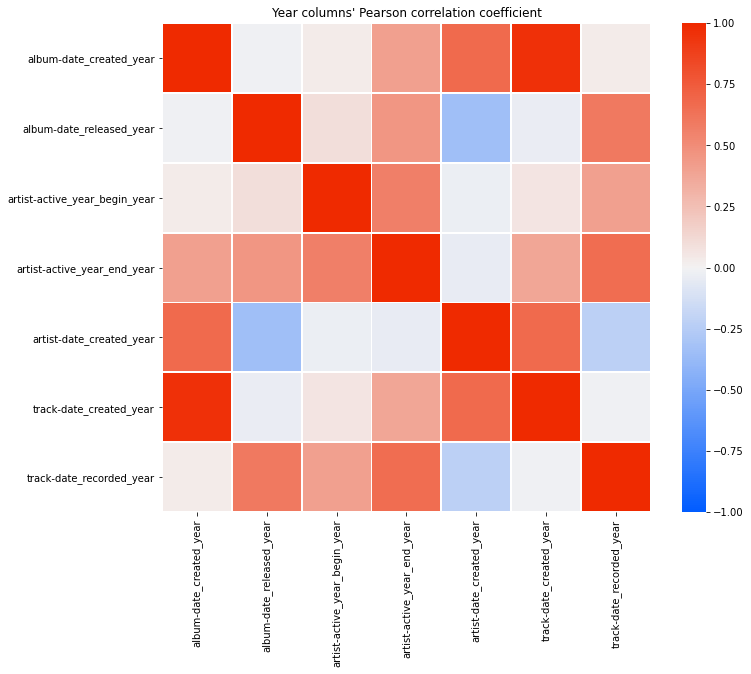

In [2201]:
norm_datetime_tracks = datetime_tracks.dropna().copy()  # N.B. = removing NaN values
del norm_datetime_tracks[('artist', 'active_year_begin_month')]
del norm_datetime_tracks[('artist', 'active_year_end_month')]
del norm_datetime_tracks[('album', 'date_created_month')]
del norm_datetime_tracks[('album', 'date_released_month')]
del norm_datetime_tracks[('artist', 'date_created_month')]
del norm_datetime_tracks[('track', 'date_created_month')]
del norm_datetime_tracks[('track', 'date_recorded_month')]
norm_datetime_tracks = normalize_df(norm_datetime_tracks, "min_max")
corr = norm_datetime_tracks.corr()


f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(255, 30, 255, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = False
heatmap = sns.heatmap(corr, mask=mask, cmap=cmap, center=0.0, vmax = 1, vmin = -1, 
                                                                              square=True, linewidths=1, ax=ax)
plt.xlabel("")
plt.ylabel("")
plt.title("Year columns' Pearson correlation coefficient")
plt.show()

In [2202]:
# investigating negative correlation
threshold = -0.6
for i in range(len(corr.columns)):
    for j in range(i):
        if (corr.iloc[i, j] <= threshold):
            print(corr.columns[i], corr.columns[j], corr.iloc[i, j])

In [2203]:
# investigating positive correlation
threshold = 0.6
for i in range(len(corr.columns)):
    for j in range(i):
        if (corr.iloc[i, j] >= threshold):
            print(corr.columns[i], corr.columns[j], corr.iloc[i, j])

('artist', 'date_created_year') ('album', 'date_created_year') 0.6788141844010688
('track', 'date_created_year') ('album', 'date_created_year') 0.9640248554083234
('track', 'date_created_year') ('artist', 'date_created_year') 0.6769701963237771
('track', 'date_recorded_year') ('artist', 'active_year_end_year') 0.6622848607866609


From the correlation matrix we discovered that:
    
- ('track', 'date_created_year') wiht ('album', 'date_created_year') are highly positive correlated (+0.96). We can therefore remove one of the two original datetime columns from the dataframe;
- ('track', 'date_created_year') wiht ('artist', 'date_created_year') are positive correlated (+0.68);
- ('track', 'date_created_year') wiht ('artist', 'date_created_year') are positive correlated (+0.68).

We don't take into consideration ('track', 'date_recorded') since we found out it is a biased colum, as well as ('artist', 'active_year_begin') and ('artist', 'active_year_end') due too many missing values. 

PREPROCESSING: since ('album', 'date_created'), ('artist', 'date_created') and ('track', 'date_created') columns are highly positive correlated, we decide to keep only ('track', 'date_created') due to the fact that it doesn't have any missing value, as opposed to ('album', 'date_created') [3.3% missing rows] and ('artist', 'date_created') [0.8% missing rows]. We need also to correct the 6 albums biased towards ('album', 'date_released') to keep this column, which doesn't show any strong correlation with the others.

<h6> Verifying if correcting baised ('album', 'date_released') correlation matrix changes </h6>

In [2205]:
modified_datetime_tracks = datetime_tracks.copy()
modified_datetime_tracks.shape

(106574, 14)

In [2206]:
biased_indeces = list(tracks[tracks[('album', 'date_released')] < (tracks[('artist', 'active_year_begin')])].index)
for idx in biased_indeces:
    # swap previous ('album', 'date_released') with ('artist', 'active_year_begin')
    # records being consistent with ('artist', 'active_year_begin') will still continue to be consistent with
    # a precedent artist career's start
    v1 = modified_datetime_tracks.at[idx, ('artist', 'active_year_begin_year')]
    v2 = modified_datetime_tracks.at[idx, ('artist', 'active_year_begin_month')]
    v3 = modified_datetime_tracks.at[idx, ('album', 'date_released_year')]
    v4 = modified_datetime_tracks.at[idx, ('album', 'date_released_month')]
    modified_datetime_tracks.at[idx, ('album', 'date_released_year')] = v1
    modified_datetime_tracks.at[idx, ('album', 'date_released_month')] = v2
    modified_datetime_tracks.at[idx, ('artist', 'active_year_begin_year')] = v3
    modified_datetime_tracks.at[idx, ('artist', 'active_year_begin_month')] = v4
# checking
modified_datetime_tracks[modified_datetime_tracks[('album', 'date_released_year')] < (modified_datetime_tracks[('artist', 'active_year_begin_year')])].shape[0]

0

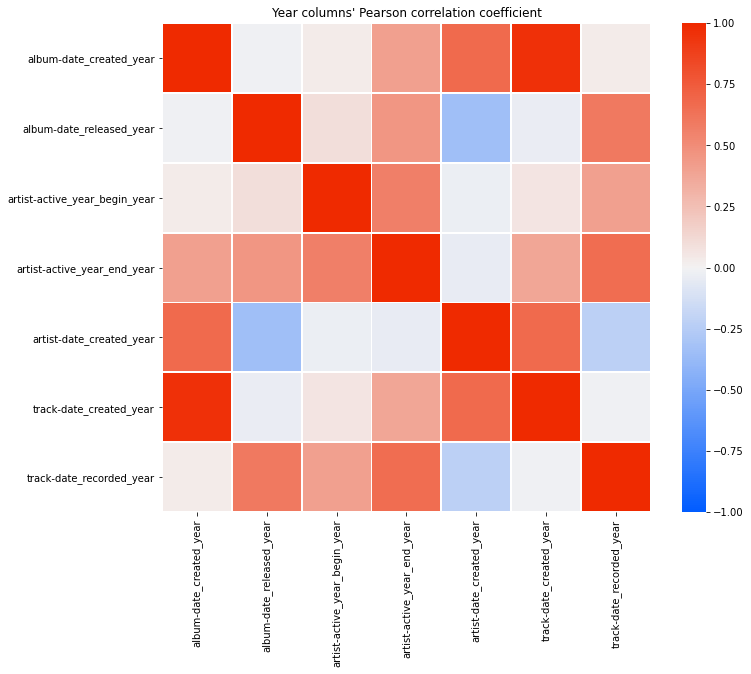

In [2207]:
norm_datetime_tracks = modified_datetime_tracks.dropna().copy()  # N.B. = removing NaN values
del norm_datetime_tracks[('artist', 'active_year_begin_month')]
del norm_datetime_tracks[('artist', 'active_year_end_month')]
del norm_datetime_tracks[('album', 'date_created_month')]
del norm_datetime_tracks[('album', 'date_released_month')]
del norm_datetime_tracks[('artist', 'date_created_month')]
del norm_datetime_tracks[('track', 'date_created_month')]
del norm_datetime_tracks[('track', 'date_recorded_month')]
norm_datetime_tracks = normalize_df(norm_datetime_tracks, "min_max")
corr = norm_datetime_tracks.corr()


f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(255, 30, 255, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = False
heatmap = sns.heatmap(corr, mask=mask, cmap=cmap, center=0.0, vmax = 1, vmin = -1, 
                                                                              square=True, linewidths=1, ax=ax)
plt.xlabel("")
plt.ylabel("")
plt.title("Year columns' Pearson correlation coefficient")
plt.show()

In [2208]:
# investigating negative correlation
threshold = -0.6
for i in range(len(corr.columns)):
    for j in range(i):
        if (corr.iloc[i, j] <= threshold):
            print(corr.columns[i], corr.columns[j], corr.iloc[i, j])

In [2209]:
# investigating positive correlation
threshold = 0.6
for i in range(len(corr.columns)):
    for j in range(i):
        if (corr.iloc[i, j] >= threshold):
            print(corr.columns[i], corr.columns[j], corr.iloc[i, j])

('artist', 'date_created_year') ('album', 'date_created_year') 0.6788141844010688
('track', 'date_created_year') ('album', 'date_created_year') 0.9640248554083234
('track', 'date_created_year') ('artist', 'date_created_year') 0.6769701963237771
('track', 'date_recorded_year') ('artist', 'active_year_end_year') 0.6622848607866609


In [2211]:
print(modified_datetime_tracks[(modified_datetime_tracks[('album', 'date_released_year')]) < 
                         (modified_datetime_tracks[('track', 'date_created_year')])].shape[0])
print(modified_datetime_tracks[(modified_datetime_tracks[('album', 'date_released_year')]) == 
                         (modified_datetime_tracks[('track', 'date_created_year')])].shape[0])
print(modified_datetime_tracks[(modified_datetime_tracks[('album', 'date_released_year')]) >
                         (modified_datetime_tracks[('track', 'date_created_year')])].shape[0])

26885
42261
1148


PREPROCESSING: Even by correcting the 36 biased rows (relative to 6 albums), having their release year set before the relative artist's actual career start (we switched the two dates), we don't detect changes in the Correlation Matrix. However, since ('album', 'date_released') present 34% of missing rows we prefer not to use it, whitout loosing important metadata (we still have ('track', 'date_created') that in some sort convey this meaning).

<b><font color="green">
RECAP: among all datetime colums the only consistent e relevant to keep is ('track', 'date_created').
</font></b>

<h6>Removing all datetime columns, a part from  ('track', 'date_created') from original DataFrame.</h6>

In [2212]:
def transform_list_into_seasons(months_list):
    season_list = []
    for m in months_list:
        if m == 3 or m == 4 or m == 5:
            season_list.append("Spring")
        if m == 6 or m == 7 or m == 8:
            season_list.append("Summer")
        if m == 9 or m == 10 or m == 11:
            season_list.append("Autumn")
        if m == 12 or m == 1 or m == 2:
            season_list.append("Winter")
            
    if len(season_list) != len(months_list):
        print("Lists lenght missmatch")
        sys.exit(-1)
    return season_list

In [2213]:
# removing all all datetime columns, a part from ('track', 'date_created') f
dates_columns = [('album', 'date_created'), ('album', 'date_released'), ('artist', 'active_year_begin'), 
                 ('artist', 'active_year_end'), ('artist', 'date_created'), ('track', 'date_recorded')]
for dcolumn in dates_columns:
    del tracks[dcolumn] 
    
# splitting datetime64[ns] into year and month
original_datetime_column = [('track', 'date_created')]
for column_name in original_datetime_column:
    years_column, months_column  = transform_column_in_years_and_months(tracks, column_name)
    season_column = transform_list_into_seasons(months_column)
    column_index = tracks.columns.get_loc(column_name)
    new_years_column_name = (column_name[0], column_name[1] + "_year")
    new_months_column_name = (column_name[0], column_name[1] + "_season")
    tracks.insert(loc=column_index, column=new_years_column_name, value=years_column)
    tracks.insert(loc=column_index+1, column=new_months_column_name, value=season_column)
    
# drop old datetime64[ns] columns
for column_name in original_datetime_column:
    del tracks[column_name]
tracks.shape

(106574, 47)

<h2>Tracks' genre_top understanding </h2>

From tracks' "genre_top" feature we find out that the dataset is unbalanced in respect to the 16 main music genres. The three, most prominent genres are:

1. Rock (14,182)
2. Experimental (10,608)
3. Electronic (9,372)

All the other **72,412 tracks** (<font color="red"> among which 56,976 must be impunted since they present NaN values</font>) belong to the remaining 13 main genres.

In [2218]:
def sns_barplot(df, column_name, x_label, x_ticks_rotation_flag, y_log_flag, title):
    count_dict = Counter(df[column_name].dropna())  # N.B. = removing NaN values
    count_dict = dict(sorted(count_dict.items(),key=operator.itemgetter(1),reverse=True))
    y = list(count_dict.keys())
    x = list(count_dict.values())
    sns.barplot(x=x, y=y, log=y_log_flag, color="#4C72B0")
    if x_ticks_rotation_flag:
        plt.xticks(rotation=90)
    plt.xlabel(x_label)
    plt.ylabel("count")
    plt.title(title)
    plt.show()

In [2219]:
def sns_histplot(df, column_name, hue, title):
    sns.displot(x=column_name, data=df.dropna(), hue=hue, multiple="dodge")  # N.B. = removing NaN values
    plt.yscale('log')
    plt.legend(title=str(hue), bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.xlabel(str(column_name))
    plt.ylabel("count")
    plt.title(title)
    plt.show()

In [2220]:
def sns_boxplot_ordered_by_mean(df, category_name, numerical_name, title, showfliers):
    grouped = df.loc[:,[category_name, numerical_name]].dropna() \
    .groupby([category_name]) \
    .mean() \
    .sort_values(by=numerical_name)

    sns.boxplot(x=df[numerical_name], y=df[category_name], order=grouped.index, color="#4C72B0", showfliers=showfliers)
    plt.title(title)
    plt.show()

In [2221]:
def sns_scatterplot(df, x_column_name, y_column_name, hue_column_name, x_ticks_rotation_flag, title):
    if hue_column_name == "":
        scatter = sns.scatterplot(x=x_column_name, y=y_column_name, data=df.dropna(), color="#4C72B0")
    else:
        scatter = sns.scatterplot(x=x_column_name, y=y_column_name, hue=hue_column_name, data=df.dropna(), palette="tab10", marker="o")
    # plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
    if x_ticks_rotation_flag:
        plt.xticks(rotation=45)
    plt.title(title)
    if hue_column_name != "":
        plt.legend(title=str(hue_column_name), bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.show()

In [2222]:
def df_described_based_upon_genres(column_name, sub_genres_list):
    if len(sub_genres_list) == 0:
        tmp_list = genres
    else:
        tmp_list = sub_genres_list
    for genre in tmp_list:
        tmp_serie = tracks[tracks[('track', 'genre_top')] == genre][column_name]
        tmp_min = tmp_serie.min()
        tmp_max = tmp_serie.max()
        tmp_mean = tmp_serie.mean()
        tmp_median = tmp_serie.median()
        tmp_std = tmp_serie.std()
        print(genre, "min=%s" %tmp_min, "max=%s" %tmp_max, "mean=%s" %tmp_mean, "std=%s" %tmp_std, "median=%s" %tmp_median)

In [2223]:
genres = tracks[('track', 'genre_top')].dropna().unique()

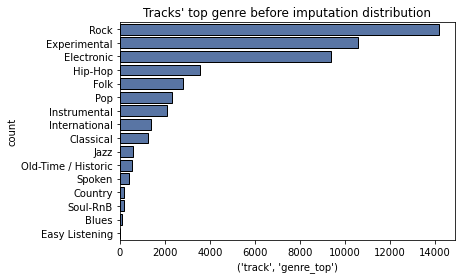

In [2224]:
column_name = ('track', 'genre_top')
sns_barplot(tracks, column_name, str(column_name), False, False, "Tracks' top genre before imputation distribution")

In [2225]:
three_top_genres = ["Rock", "Experimental", "Electronic"]

In [2226]:
rock = tracks[tracks[('track', 'genre_top')] == "Rock"].shape[0] 
rock

14182

In [2227]:
experimental = tracks[tracks[('track', 'genre_top')] == "Experimental"].shape[0] 
experimental

10608

In [2228]:
electronic = tracks[tracks[('track', 'genre_top')] == "Electronic"].shape[0] 
electronic

9372

In [2229]:
rock + experimental + electronic

34162

<h6>Songs NOT having as main genre Rock, Experimental or Electronic</h6>

In [2230]:
tracks.shape[0] - (rock + experimental + electronic)

72412

<h6>among which NaN genre_top: </h6>

In [2231]:
tracks[(tracks[('track', 'genre_top')].isna())].shape[0]

56976

<h6> so untill genre_top imputation we have a total of NOT Rock, Experimental or Electronic tracks:</h6<

In [2232]:
tracks.shape[0] - (rock + experimental + electronic) - tracks[(tracks[('track', 'genre_top')].isna())].shape[0]

15436

<h6>Numerical features</h6>

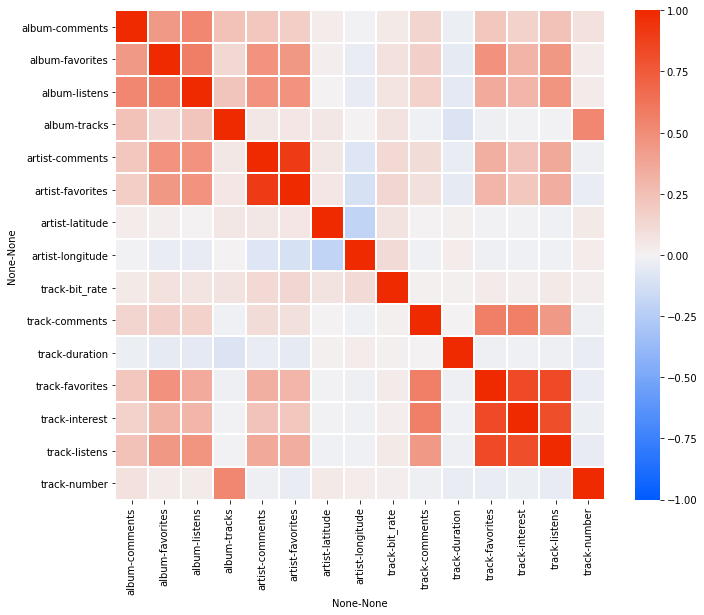

In [2235]:
norm_numeric_tracks = numeric_tracks.dropna().copy()  # N.B. = removing NaN values
del norm_numeric_tracks[('album', 'id')]
del norm_numeric_tracks[('artist', 'id')]
# del norm_numeric_tracks[('track', 'date_created_year')]
norm_numeric_tracks = normalize_df(norm_numeric_tracks, "min_max")
corr = norm_numeric_tracks.corr()


f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(255, 30, 255, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = False
heatmap = sns.heatmap(corr, mask=mask, cmap=cmap, center=0.0, vmax = 1, vmin = -1, square=True, linewidths=1, ax=ax)
plt.show()

In [2427]:
# investigating negative correlation
threshold = -0.6
for i in range(len(corr.columns)):
    for j in range(i):
        if (corr.iloc[i, j] <= threshold):
            print(corr.columns[i], corr.columns[j], corr.iloc[i, j])

In [2428]:
# investigating positive correlation
threshold = 0.5
for i in range(len(corr.columns)):
    for j in range(i):
        if (corr.iloc[i, j] >= threshold):
            print(corr.columns[i], corr.columns[j], corr.iloc[i, j])

('album', 'listens') ('album', 'comments') 0.5237694850080699
('album', 'listens') ('album', 'favorites') 0.5736968534906329
('artist', 'favorites') ('artist', 'comments') 0.9080624795232408
('track', 'favorites') ('track', 'comments') 0.5699743395360148
('track', 'interest') ('track', 'comments') 0.5625378614681774
('track', 'interest') ('track', 'favorites') 0.8309030328748889
('track', 'listens') ('track', 'favorites') 0.8302278182760793
('track', 'listens') ('track', 'interest') 0.8193722868706852
('track', 'number') ('album', 'tracks') 0.529412354755565


From the Pearson Correlation Matrix we detected some medium to hight positive correlated features, as well as some confirm of our data understanding assumptions and constrains (<b><font color="red">Please note that, since the imputation is not yet done, correlation among features may still change.</font></b>).

**Keep**: 
- ('album', 'favorites');
- ('artist', 'favorites'); 
- ('track', 'bit_rate'), ('track', 'duration'), ('track', 'listens'), ('track', 'date_created_year');

**Drop**: 
- ('track', 'interest'), ('track', 'favorites')  => ('track', 'listens');
- ('artist', 'comments') => ('artist', 'favorites').

**Not sure to keep**:*
- ('album', 'listens'), (album, comments);
- ('track', 'comments').


*they have a moderate positive correlation with ('album', 'favorites') and ('album', 'listens') and ('track', 'favorites') and ('track', 'interest'), respectivelly (r~=0.50). In addition we are doubtful about ('album', 'listens')'s semantic (we interpret it as tracks' playcount sum, which in most cases isn't true) and in general about comments features, which not always convay an audiance's appreciation idea.

N.B.: we detected that ('album', 'tracks')  and('track', 'number') are biased.

We can get rid also of ('artist',  'latitude') and ('artist', 'longitude'), since we discovered that they have too many missing values.

<h6> Track bit-rate insight </h6>

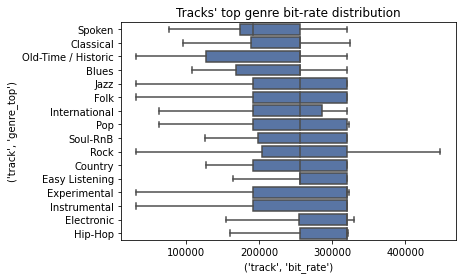

In [2300]:
sns_boxplot_ordered_by_mean(tracks, ('track', 'genre_top'), ('track', 'bit_rate'), "Tracks' top genre bit-rate distribution", False)

In [2261]:
df_described_based_upon_genres(('track', 'bit_rate'), tracks[('track', 'genre_top')].dropna().unique())

Hip-Hop min=24000 max=321966 mean=279045.3018018018 std=65532.39094324407 median=320000.0
Pop min=-1 max=323488 mean=246443.30703259006 std=73395.45123371207 median=256000.0
Rock min=-1 max=448000 mean=253943.74136229022 std=59443.3940464669 median=256000.0
Experimental min=-1 max=322892 mean=265434.06919306185 std=67695.1884336293 median=320000.0
Folk min=-1 max=320047 mean=241453.59864430968 std=63765.1462226865 median=256000.0
Jazz min=-1 max=320817 mean=239145.2819614711 std=67927.36798997073 median=256000.0
Electronic min=-1 max=330042 mean=275473.8409090909 std=63060.35394390153 median=320000.0
Spoken min=77666 max=320000 mean=220359.60756501183 std=63448.66649734342 median=192000.0
International min=-1 max=320000 mean=245478.06623470123 std=62214.83856148678 median=256000.0
Soul-RnB min=-1 max=320000 mean=253369.02285714285 std=54888.409428664185 median=256000.0
Blues min=108521 max=320000 mean=232565.15454545454 std=63971.86379723117 median=256000.0
Country min=128000 max=32000

In [2262]:
tracks[tracks[('track', 'bit_rate')] == -1].shape[0]

105

In [2291]:
tracks[(tracks[('track', 'bit_rate')] < 200000) & (tracks[('track', 'genre_top')] == "Electronic")].shape[0]

1946

In [2292]:
tracks[(tracks[('track', 'bit_rate')] < 200000) & (tracks[('track', 'genre_top')] == "Hip-Hop")].shape[0]

727

In [2293]:
tracks[(tracks[('track', 'bit_rate')] < 200000) & (tracks[('track', 'genre_top')] == "Classical")].shape[0]

472

All genres have a similar median bit_rate of 256.000. We detect some differences in:
- Spoken having a smaller median bit_rate (192.000);
- Hip-Hop, Experimetal, Electronic and Instrumental having a greater median bit_rate (320.000).

We notice also that:
- the most jumbled bit_rate genres are Pop, Old-Time / Historic and Instrumental (std~=70000); 
- the most stable bit_rate genres are Easy Listening and Soul-RnB (std~=50000). 

PREPROCESIING: <font color=red>From the lowest bit-rates values we can notice how the **('track', 'bit_rate')** column has **105 missing values**, expressed as **-1**. We detected also that 1.966 Electronic track, 727 Hip-Hop tracks and 427 Classical tracks have a bit-rate lower than 200.000, which is an anomalous behaviour </font> 

<h6> Track duration insight </h6>

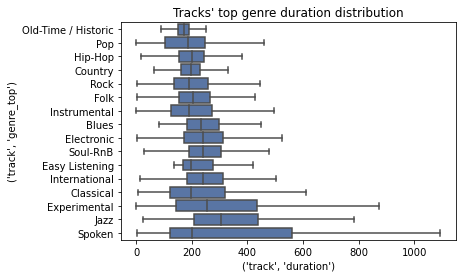

In [2299]:
sns_boxplot_ordered_by_mean(tracks, ('track', 'genre_top'), ('track', 'duration'), "Tracks' top genre duration distribution", False)

In [2265]:
df_described_based_upon_genres(('track', 'duration'), tracks[('track', 'genre_top')].dropna().unique())

Hip-Hop min=5 max=3672 mean=202.75957207207207 std=118.36532410546295 median=200.0
Pop min=0 max=2511 mean=188.66166380789022 std=153.09818583406573 median=186.0
Rock min=2 max=3675 mean=225.49710901142294 std=189.6491108137779 median=189.0
Experimental min=1 max=3718 mean=362.6684577677225 std=390.91486116028665 median=256.0
Folk min=4 max=3688 mean=230.93649661077416 std=187.33633322840737 median=206.0
Jazz min=24 max=2940 mean=381.91943957968476 std=331.697638404608 median=307.0
Electronic min=4 max=3714 mean=263.77069995731966 std=226.63249296466444 median=240.0
Spoken min=5 max=3706 mean=590.8676122931442 std=897.728791134585 median=201.0
International min=15 max=3667 mean=300.02375809935205 std=302.7215436810421 median=240.0
Soul-RnB min=2 max=1557 mean=264.46285714285716 std=146.52035888060902 median=242.0
Blues min=83 max=710 mean=258.05454545454546 std=108.8204342288469 median=234.0
Country min=64 max=2058 mean=216.1701030927835 std=153.4265513733219 median=198.0
Classical min

In [2275]:
# 0 duration tracks
tracks[tracks[('track', 'duration')] == 0].shape[0]

16

In [2269]:
# To obtain an official stream on Spotify the track music be played for at least 30 seconds
# for a music creator to secure payment for a stream
# https://www.prsformusic.com/m-magazine/features/song-length-the-spotify-effect/#:~:text=To%20obtain%20an%20official%20stream,ranking%20within%20a%20streaming%20platform.
tracks[tracks[('track', 'duration')] < 30].shape[0]

2057

In [2281]:
# if a track is longer than 10 minutes, in the iTunes Store it will only be available 
# to buy as a part of the whole album
# https://itunespartner.apple.com/music/articles/rights-and-pricing_album-only
tracks[tracks[('track', 'duration')] > 600].shape[0]

5938

According with tracks' duration we can state that:
- Experimental and Jazz have the longuest tracks (median=256 and median=370);
- Pop, Rock and Instrumental have the shortest tracks (median=186, median=189 and  median=190);
- all other genres have a median duration between 196 and 242.

PREPROCESSING: <font color="red">16 Pop and Instrumental tracks have the duration set to 0 (biased tracks), 1 Instrumental track have a duration set to 11.030 seconds (183 minuted!), while in general songs mustn't have a duration lower than 30 seconds to obtain an official stream on Spotify and so to the previous Echonest (in our dataset we have 2.057 tracks which doesn't respect this). We have also 5.938 songs having a duration greated than 10 minutes. Officially, we didn't found any maximum duration constrained imposed by Spotify, but many music services like iTunes actually have one, so based on them we will remove these long, outlier tracks, too. This removal aims also to decrease the great standard deviantion that we observed among thracks belonging to the same music genre.</font>

<h6>Track listens insight</h6>

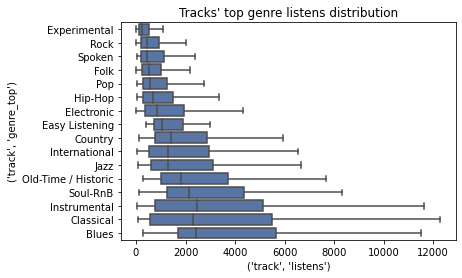

In [2308]:
sns_boxplot_ordered_by_mean(tracks, ('track', 'genre_top'), ('track', 'listens'), "Tracks' top genre listens distribution", False)

In [2288]:
df_described_based_upon_genres(('track', 'listens'), tracks[('track', 'genre_top')].dropna().unique())

Hip-Hop min=25 max=433992 mean=1671.9774774774776 std=8458.308936739784 median=686.0
Pop min=23 max=79940 mean=1381.304459691252 std=3922.6219002365265 median=553.0
Rock min=9 max=178139 mean=931.3711042166126 std=3085.775630798082 median=427.5
Experimental min=1 max=119301 mean=560.8616138763198 std=2077.0270973220804 median=223.0
Folk min=18 max=42250 mean=990.5319300749197 std=2150.845425956265 median=526.0
Jazz min=74 max=143278 mean=3588.0875656742555 std=9012.978016290916 median=1271.0
Electronic min=7 max=543252 mean=2224.9811139564663 std=8578.22286275248 median=841.0
Spoken min=24 max=12150 mean=978.0898345153664 std=1359.7964116036496 median=429.0
International min=21 max=86617 mean=3056.629229661627 std=6402.5217253705905 median=1275.0
Soul-RnB min=129 max=43369 mean=4163.337142857143 std=6370.933893318763 median=2139.0
Blues min=282 max=143301 mean=8508.727272727272 std=20408.858840079607 median=2439.0
Country min=109 max=24571 mean=2453.8865979381444 std=3041.6280133391233

In [2307]:
tracks[tracks[('track', 'listens')] < 10].shape[0]

158

In [2310]:
tracks[tracks[('track', 'listens')] < 10][('track', 'genre_top')].unique()

array(['Experimental', nan, 'Rock', 'Electronic'], dtype=object)

In [2309]:
tracks[tracks[('track', 'listens')] > 250000].shape[0]

16

In [2311]:
tracks[tracks[('track', 'listens')] > 250000][('track', 'genre_top')].unique()

array(['Hip-Hop', 'Electronic', 'Instrumental', nan], dtype=object)

According to listens we found the following:
- the most listened tracks are Blues, Classical, Soul-RnB and Instrumental (median~=2.000);
- the less listened tracks are Experimental, Spoken, Folk,  Rock, Pop and Hip-Hop (median between 200 and 700)
- all other genres have a median tracks' listens between 800 and 2.000.

PREPROCESSING: <font color="red">16 extreme listened tracks belonging to Hip-Hop, Electronic, Instrumental and NaN (more than 250.000 listens), 158 extreme listened tracks belonging to Rock, Electronic, Experimental and NaN (more than 250.000 listens) </font>

<h6>Top genre album favorites</h6>

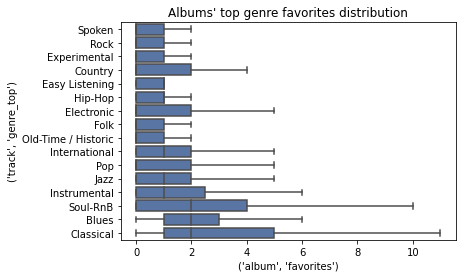

In [2436]:
sns_boxplot_ordered_by_mean(tracks, ('track', 'genre_top'), ('album', 'favorites'), "Albums' top genre favorites distribution", False)

In [2425]:
df_described_based_upon_genres(('album', 'favorites'), tracks[('track', 'genre_top')].dropna().unique())

Hip-Hop min=0 max=33 mean=1.1531531531531531 std=2.188310556892194 median=1.0
Pop min=0 max=38 mean=1.7757289879931388 std=3.4469508072090207 median=0.0
Rock min=0 max=29 mean=0.7232407276829784 std=1.6282950429594931 median=0.0
Experimental min=0 max=18 mean=0.9064856711915535 std=1.75514526736997 median=0.0
Folk min=0 max=23 mean=1.1972886193364252 std=2.4405785720643083 median=0.0
Jazz min=0 max=37 mean=1.9106830122591945 std=4.395860260223563 median=1.0
Electronic min=0 max=40 mean=1.190460947503201 std=2.314256115683725 median=0.0
Spoken min=0 max=4 mean=0.4562647754137116 std=0.8071670932698555 median=0.0
International min=0 max=23 mean=1.5435565154787616 std=3.0639926616826814 median=1.0
Soul-RnB min=0 max=23 mean=2.7657142857142856 std=3.8725339099116285 median=2.0
Blues min=0 max=14 mean=3.209090909090909 std=3.343061977612007 median=2.0
Country min=0 max=6 mean=1.0051546391752577 std=1.305617288664723 median=0.0
Classical min=0 max=39 mean=4.085365853658536 std=4.686600932850

In [2439]:
len(tracks[tracks[('album', 'favorites')] >= 30][('album', 'id')].unique())

18

According with album audiance's preference:
- Soul-RnB, Blues and Classical have the greatest number of favorites (median=2);
- Hip-Hop, Jazz, International, Instrumental and Easy Listening have a medium number of favorites (median=1);
- Pop, Rock, Experimental, Folk, Electronic, Spoken, Country and Old-Time / Historic have the lowest number of favorites (median=0).

PREPROCESSING: <font color="red">18 albums have a number of favorites greater than 30 (which is a value quite high, since the majority of albums don't display any likeness).</font>

<h6>Artist favorites insight</h6>

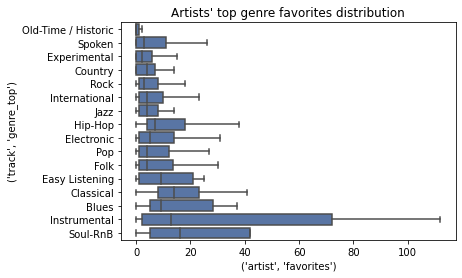

In [2324]:
sns_boxplot_ordered_by_mean(tracks, ('track', 'genre_top'), ('artist', 'favorites'), "Artists' top genre favorites distribution", False)

In [2312]:
df_described_based_upon_genres(('artist', 'favorites'), tracks[('track', 'genre_top')].dropna().unique())

Hip-Hop min=0 max=117 mean=15.59009009009009 std=22.022895661253113 median=7.0
Pop min=0 max=963 mean=21.920668953687823 std=83.55534987293129 median=4.0
Rock min=0 max=788 mean=8.641799464109434 std=33.852722101585265 median=3.0
Experimental min=0 max=788 mean=8.197209653092006 std=24.721073275301777 median=2.0
Folk min=0 max=788 mean=24.622190510167677 std=60.90896338010782 median=4.0
Jazz min=0 max=431 mean=14.97723292469352 std=53.353220590865725 median=4.0
Electronic min=0 max=963 mean=18.936833119931713 std=66.45437720598316 median=5.0
Spoken min=0 max=199 mean=7.264775413711584 std=13.24722497576178 median=3.0
International min=0 max=431 mean=10.321094312455003 std=30.780701408594823 median=4.0
Soul-RnB min=0 max=788 mean=83.59428571428572 std=196.61652674139296 median=16.0
Blues min=0 max=788 mean=50.69090909090909 std=130.6869461662049 median=9.0
Country min=0 max=788 mean=8.587628865979381 std=56.654073033099635 median=4.0
Classical min=0 max=861 mean=43.72195121951219 std=97

In [2323]:
len(tracks[tracks[('artist', 'favorites')] > 350][('artist', 'id')].unique())

9

According to clients'preference:
- Blues, Easy Listening, Instrumental, Classical and Soul-RnB artists are the most favourited (median between 9 and 16);
- Old-Time / Historic, Experimental, Rock and Spoken artists are the list favourited (median between 0 and 3);
- all the other genres have a median artists' favourite between 4 and 7.

PREPROCESSING: <font color="red">9 artist are enourmously liked (more than 350 favourites) </font>

<h6>Tracks' years</h6> 

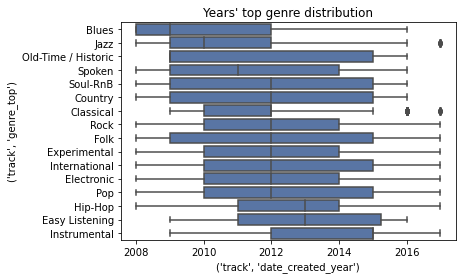

In [2260]:
sns_boxplot_ordered_by_mean(tracks, ('track', 'genre_top'), ('track', 'date_created_year'), "Years' top genre distribution", True)

In [2259]:
df_described_based_upon_genres(('track', 'date_created_year'), tracks[('track', 'genre_top')].dropna().unique())

Hip-Hop min=2008 max=2017 mean=2012.6097972972973 std=2.4115545485189984 median=2013.0
Pop min=2008 max=2017 mean=2012.5222984562606 std=2.488742606192471 median=2012.0
Rock min=2008 max=2017 mean=2011.9432379072064 std=2.6214429126825434 median=2012.0
Experimental min=2008 max=2017 mean=2012.3075980392157 std=2.4330636988711354 median=2012.0
Folk min=2008 max=2017 mean=2012.1912236889048 std=2.785804749500005 median=2012.0
Jazz min=2008 max=2017 mean=2010.8108581436077 std=2.1388522416053912 median=2010.0
Electronic min=2008 max=2017 mean=2012.3854033290654 std=2.5461679454476918 median=2012.0
Spoken min=2008 max=2016 mean=2011.3049645390072 std=2.671447933746915 median=2011.0
International min=2008 max=2017 mean=2012.334053275738 std=2.57831223978115 median=2012.0
Soul-RnB min=2008 max=2016 mean=2011.5314285714285 std=2.6841136969695336 median=2012.0
Blues min=2008 max=2016 mean=2010.581818181818 std=2.734025557023082 median=2009.0
Country min=2008 max=2016 mean=2011.778350515464 std

Year creation differences:
- Classical, Old-Time / Historic, Instrumental and Easy Listening aren't present in 2008;
- Spoken, Soul-RnB, Blues, Country, Old-Time / Historic and Easy Listening aren't present after 2016;
- Jazz and Old-Time / Historic have the most distant in time tracks (median=2009 and median=2009);
- Blues and Spoken,..., Hip-Hop and Easy Listening (median=2010, median=2011,..., median=2013, median=2013) have quite realted in time tracks;
- Instrumental has the most recent tracks (median=2015)

with ...= all other genres and ...'s median=2012.

We detect some extreme recet outlier tracks for Jazz and Classical.

<h6> Categorical features </h6>

<h6>Album type insight</h6>

In [2516]:
def sns_hued_barplot(outside_df, column_name, nan_flag, log_flag, rotation_flag):
    fig, ax = plt.subplots(figsize=(16, 8))
    column_name_count = (outside_df, column_name[0], column_name[1] + "_count")
    df = get_column_insight_based_on_genres(column_name, nan_flag)
    sns.barplot(x=column_name, y=column_name_count, hue=('track', 'genre_top'), data=df, palette="tab10")
    if log_flag: 
        plt.yscale("log")
    if rotation_flag:                                
        plt.xticks(rotation=90)
    plt.show()

In [2478]:
def get_empty_genres_dict(outside_df, nan_flag):
    empty_dict = {}
    genres = list(outside_df[('track', 'genre_top')].unique())
    for g in genres:
        if str(g) == "nan":
            if nan_flag == False:
                continue
        empty_dict[str(g)] = 0
    return empty_dict

In [2537]:
def get_column_insight_based_on_genres(outside_df, column_name, nan_flag):
    """
        Return a DataFrame, having 3 columns:
        1. column_name
        2. ('track', 'genre_top')
        3. (column_name[0], column_name[1] + "_count")
        and rows as many as all the combinations among column_name's and ('track', 'genre_top')'s
        unique values.
    """
    hue = ('track', 'genre_top')
    column_name_count = (column_name[0], column_name[1] + "_count")
    genres_insight = {}
    column_dict = Counter(outside_df[column_name])
    if nan_flag == False:
        del column_dict[np.nan]

    # intialize dict with column_name
    for value in column_dict.keys():
        genres_insight[str(value)] = get_empty_genres_dict(outside_df, nan_flag)
        if nan_flag == False:
            del tmp_dict2[np.nan]

    for key in genres_insight.keys():
        if str(key) == "nan":
            hue_dict = Counter(outside_df[(tracks[column_name].isna())][hue])
        else:
            hue_dict = Counter(outside_df[(tracks[column_name] == key)][hue])
        if nan_flag == False:
            del hue_dict[np.nan]
        for k, v in hue_dict.items():
            genres_insight[str(key)][str(k)] = v
            
    # create DataFrame
    column_name_column = []
    hue_column = []
    count_column = []
    for key, value in genres_insight.items():
        tmp_key_values = [key]*len(value)
        column_name_column = column_name_column + tmp_key_values
        for k, v in value.items():
            hue_column.append(k)
            count_column.append(v)

    df = pd.DataFrame()
    df[column_name] = column_name_column
    df[hue] = hue_column
    df[column_name_count] = count_column
    return df

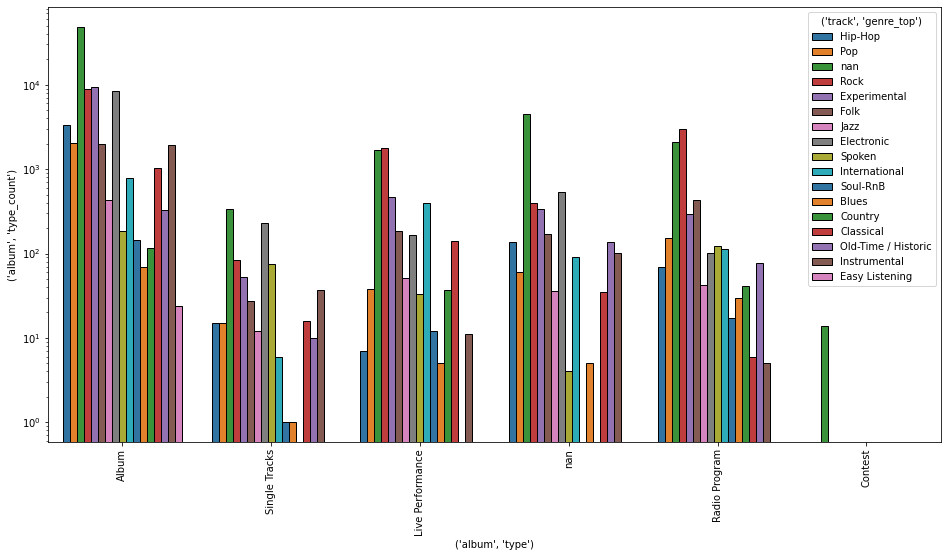

In [2539]:
sns_hued_barplot(tracks, ('album', 'type'), True, True, True)

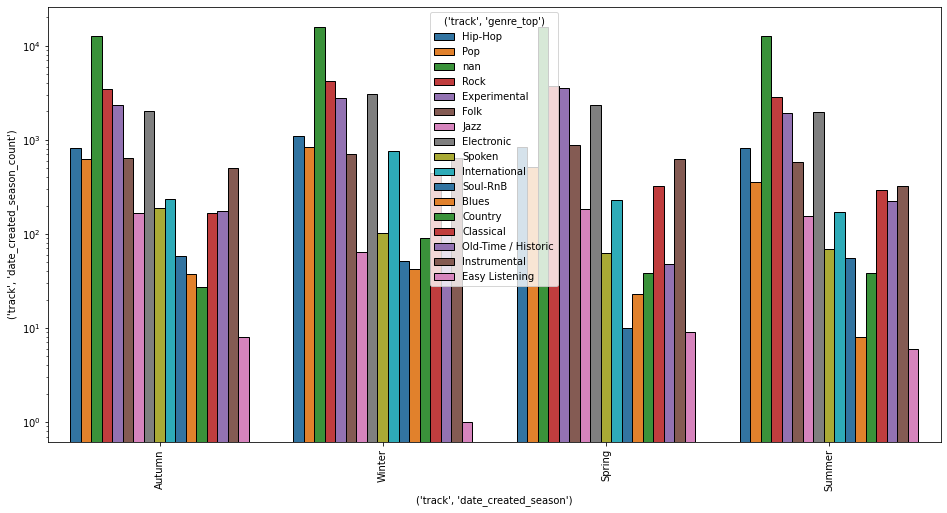

In [2543]:
sns_hued_barplot(tracks, ('track', 'date_created_season'), True, True, True)

<font color="indigo"><h6>('track', 'genre_top') imputation</h6></font>

In [2550]:
len(tracks[('album', 'tags')].unique())

2388

In [2551]:
len(tracks[('artist', 'tags')].unique())

15660

In [2552]:
len(tracks[('track', 'tags')].unique())

2451

In [2572]:
from sklearn.impute import KNNImputer

important_features = [ ('album', 'favorites'), 
                       ('artist', 'favorites'),
                       ('track', 'bit_rate'),
                       ('track', 'duration'),
                       ('track', 'listens'),
                       ('track', 'date_created_year'),
                       ('track', 'date_created_season'),
                       ('track', 'genre_top')]

cleanup_nums = {('track', 'genre_top'): {"Rock": 1,  "Experimental": 2,
                            "Electronic": 3, "Hip-Hop": 4, 
                            "Pop": 5, "Folk": 6, "Jazz": 7, "Spoken": 8, 
                            "International": 9, "Soul-RnB": 10, "Blues": 11, 
                            "Country": 12, "Classical": 13, "Old-Time / Historic": 14,
                            "Instrumental": 15, "Easy Listening": 16},
               ('track', 'date_created_season'): {"Spring": 1, "Summer": 2, "Autumn": 3, "Winter": 4}
               }

df_copy = tracks.copy()
X = df_copy[important_features]
X = X.replace(cleanup_nums)
# X = normalize_df(X, "min_max")
imputer = KNNImputer(n_neighbors=2)
new_X = imputer.fit_transform(X)

In [2575]:
df = pd.DataFrame(new_X, columns=X.columns)

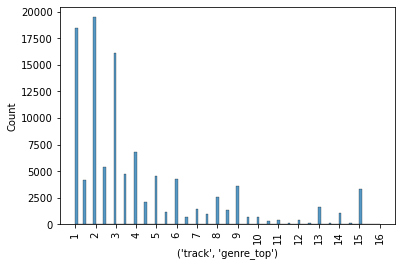

In [2586]:
fig, ax = plt.subplots()
sns.histplot(x=('track', 'genre_top'), data=df)
# plt.yscale("log")
# ax.set_xticklabels(cleanup_nums[('track', 'genre_top')].keys())
plt.xticks(range(1, 17),rotation=90)
plt.show()

<h2>Echonest features </h2>

For **13,129 tracks**, we have 2 pools of audio and temporal features (**93,445 tracks** apparently don't have them):

- **audio_features**:
    1. acousticness
    2. danceability
    3. energy
    4. instrumentalness	
    5. liveness	
    6. speechiness	
    7. tempo
    8. valence    

- **temporal_features**:
    1. '000'
    ... 
    
    223. '223'
    
<font color=red> Our main problem in using the audio feature is however that only **12.32%** of tracks share this info. Among our main genre_top tracks we also notice a high imbalance, due to the fact that we have audio features only for:
- 3892 Rock  (27.44%)
- 17 Experimental (0.16%)
- 2170 Electronic  (23.15%)

</font>

In [ ]:
echonestData = pd.read_csv('../../data/fma_metadata/echonest.csv',index_col=0, header=[0, 1, 2])
echonestData.shape

In [ ]:
echonestData.head().T

In [ ]:
audioFeatures = echonestData['echonest']['audio_features']
audioFeatures.head()

<h6>Checking how many tracks haven't audio features in the whole dataset</h6>

In [ ]:
tracks_ids = list(tracks.index.values)
echonest_ids = list(audioFeatures.index.values)
print(len(set(tracks_ids).difference(set(echonest_ids))))

<h6>Checking genre_top distribution among audio features</h6>

In [ ]:
audioFeaturesTotalSet=audioFeatures.merge(tracks, left_index=True, right_index=True, how='inner')
audioFeaturesTotalSet.shape

In [ ]:
audioFeaturesTotalSet[[('track', 'genre_top')]].apply(pd.value_counts).plot(kind='bar', legend=False, title="Tracks with audio features top genre")
plt.show()

In [ ]:
top_genres = ["Rock", "Experimental", "Electronic"]
for genre_top in top_genres:
    print(genre_top, audioFeaturesTotalSet[audioFeaturesTotalSet[('track', 'genre_top')] == genre_top].shape[0],
     str((audioFeaturesTotalSet[audioFeaturesTotalSet[('track', 'genre_top')] == genre_top].shape[0] /
       tracks[tracks[('track', 'genre_top')] == genre_top].shape[0])*100) + "%")

We discover that only **Rock** and **Electronic** tracks have audio features (Experimental tracks are almost deprived about the info). 

<h6>Checking if exist differences among Rock, Experimental and Electronic tracks</h6>

In [ ]:
def plotTopGenreFeatures(df, genreTitle, colour):
    features = [np.median(df['acousticness'][df[('track', 'genre_top')] == genreTitle]), 
              np.median(df['danceability'][df[('track', 'genre_top')] == genreTitle]),
              np.median(df['energy'][df[('track', 'genre_top')] == genreTitle]),
              np.mean(df['instrumentalness'][df[('track', 'genre_top')] == genreTitle]),
              np.median(df['liveness'][df[('track', 'genre_top')] == genreTitle]),
              np.median(df['speechiness'][df[('track', 'genre_top')] == genreTitle]),
              np.median(df['tempo'][df[('track', 'genre_top')] == genreTitle]),
              np.median(df['valence'][df[('track', 'genre_top')] == genreTitle])]
    features[-2] = features[-2]/251
    features[-3] = features[-3] * 4
    features += features[:1]
    ax.plot(angles, features, color=colour, linewidth = 1, label = genreTitle)
    ax.fill(angles, features, color=colour, alpha = 0.25)

In [ ]:
tracks_top = tracks[(tracks[('track', 'genre_top')] == 'Electronic') |
                    (tracks[('track', 'genre_top')] == 'Experimental') |
                    (tracks[('track', 'genre_top')] == 'Rock')]
tracks_top.shape

In [ ]:
audioFeaturesSetA=audioFeatures.merge(tracks_top, left_index=True, right_index=True, how='inner')
audioFeaturesSetA.shape

In [ ]:
num_vars=len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

plotTopGenreFeatures(audioFeaturesSetA, 'Electronic','green')
plotTopGenreFeatures(audioFeaturesSetA, 'Experimental','blue')
plotTopGenreFeatures(audioFeaturesSetA, 'Rock','red')

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles), labels)

for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

ax.set_ylim(0, 1)
ax.set_rlabel_position(180 / num_vars)
ax.set_title('Genres and features')
ax.legend(loc='lower center')
plt.show()

From the above radar plot we can notice that:

- **Experimental** music is defined by greater **valence** and **acousticness** values;
- **Electronic** and **Rock** music have almost overlllaping audio feature, with slighter higher **acousticness** value for **Rock** and higher **danceability, instrumentalness** and **speechiness** values for **Electronic**.

<h6>Checking if exist differences among Rock, Experimental, Electronic and Other tracks</h6>

In [ ]:
tracks_four = tracks[~(tracks[('track', 'genre_top')].isna())]
tracks_four.shape

In [ ]:
# replacing all genre_top with "Other" if not belonging to Electronic, Experimental, Rock
genre_top_map = {}
genre_tops = list(tracks[('track', 'genre_top')].unique())
for genre_top in genre_tops:
    if str(genre_top) == "nan":
        continue
    if str(genre_top) == "Electronic" or str(genre_top) == "Experimental" or str(genre_top) == "Rock":
        genre_top_map[str(genre_top)] = genre_top
    else:
         genre_top_map[str(genre_top)] = "Other"
tracks_four[('track', 'genre_top')] = tracks_four[('track', 'genre_top')].map(genre_top_map)
tracks_four[('track', 'genre_top')].unique()

In [ ]:
audioFeaturesSetB = audioFeatures.merge(tracks_four, left_index=True, right_index=True, how='inner')
audioFeaturesSetB.shape

In [ ]:
num_vars=len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

plotTopGenreFeatures(audioFeaturesSetB, 'Electronic','green')
plotTopGenreFeatures(audioFeaturesSetB, 'Experimental','blue')
plotTopGenreFeatures(audioFeaturesSetB, 'Rock','red')
plotTopGenreFeatures(audioFeaturesSetB, 'Other','yellow')

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles), labels)

for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

ax.set_ylim(0, 1)
ax.set_rlabel_position(180 / num_vars)
ax.set_title('Genres and features')
ax.legend(loc='lower center')
plt.show()

From the above radar plot we can notice that:

- **Experimental** music is defined by greater **valence** and **acousticness** values;
- **Electronic** and **Rock** music have almost overlllaping audio feature, with slighter higher **acousticness** value for **Rock** and higher **danceability, instrumentalness** and **speechiness** values for **Electronic**;
- **Other** music has greater **acousticness** values and **skrinked other audio features**.

We can finally notice how the <font color=red>audio features liveness, speechiness and tempo are the most overlapping </font> (and so probably the lest relevant features in the models' features selection process).

<h2> Librosa features </h2> 

For each 106,572 tracks, we have 518 Librosa features, having the following cardinalities:

1. **chroma_cens** = 12
2. **chroma_cqt** = 12
3. **chroma_stft** = 12
4. **mfcc** = 20
5. **rmse** = 1
6. **spectral_bandwidth** = 1
7. **spectral_centroid** = 1
8. **spectral_contrast** = 7
9. **spectral_rolloff** = 1
10. **tonnetz** = 6
11. **zcr** = 1

and for each cardinality feature we have the following information:
1. min = min feature's value;
2. max = max feature's value;
3. median = median feature's value;
4. mean = avg feature's values;
5. std = std feature's values;
6. skew = feature's values asymmetry distribution
7. kurtosis = feature's values tailedness distribution

In [ ]:
librosaFeatures = pd.read_csv('../../data/fma_metadata/features.csv', index_col=0, header=[0, 1, 2])
librosaFeatures.shape

In [ ]:
librosaFeatures.head(2)

In [ ]:
librosa_columns = {}
librosa_columns_info = set()
for c in librosaFeatures.columns:
    librosa_columns_info.add(c[1])
    try:
        if librosa_columns[str(c[0])] < c[2]:
            librosa_columns[str(c[0])] = c[2]
    except KeyError:
        librosa_columns[str(c[0])] = c[2]
print("Librosa columns:", librosa_columns)
print("Librosa columns info:", librosa_columns_info)

<h6>Checking librosa features among Rock, Experimental and Electronic genre_top tracks</h6>

In [ ]:
librosaSetA = librosaFeatures.merge(tracks_top, left_index=True, right_index=True, how='inner')
librosaSetA.shape

In [ ]:
top_genres = ["Rock", "Experimental", "Electronic"]
for var in librosaSetA.columns:
    if var[1] != "mean":
        continue
    for genre_top in top_genres:
        sns.distplot(librosaSetA[librosaSetA[('track', 'genre_top')] == genre_top][var], kde=False, label=genre_top)
    plt.ylabel("count")
    plt.legend()
    plt.title("Genre_top's " + var[0] + " distribution")
    plt.show()

From the above plots we can observe that the following librosa are so characterized:
- all ('chroma_cens', 'mean', '*') are related to ('chroma_cens', 'mean', '01');
- all ('chroma_cqt', 'mean', '*') are related to ('chroma_cqt', 'mean', '01');
- all ('chroma_stft', 'mean', '*') are related to ('chroma_stft', 'mean', '01');
- all ('mfcc', 'mean', '*') are different among them;
- ('rmse', 'mean', '01') is unique in its kind;
- ('spectral_bandwidth', 'mean', '01') is unique in its kind;
- ('spectral_centroid', 'mean', '01') is unique in its kind;
- ('spectral_rolloff', 'mean', '01') is unique in its kind;
- ('spectral_contrast', 'mean', '01'), ('spectral_contrast', 'mean', '07') are unique in their kind, 
  all the other ('spectral_contrast', 'mean', '*') are related to ('spectral_contrast', 'mean', '02');
- ('tonnetz', 'mean', '01') and ('tonnetz', 'mean', '02') are unique in their kind, all the other
  ('tonnetz', 'mean', '*') are related to ('tonnetz', 'mean', '03');
- ('zcr', 'mean', '01') is unique in it kind.

Taking into account only the Rock, Experimental and Electronic as genre_top, we will need to use **34 librosa features** to discriminated among these music genres.

<h6>Checking librosa features among Rock, Experimental, Electronic and Other genre_top tracks</h6>

In [ ]:
librosaSetB = librosaFeatures.merge(tracks_four, left_index=True, right_index=True, how='inner')
librosaSetB.shape

In [ ]:
librosaSetB[librosaSetB[('track', 'genre_top')] == "Other"][('zcr', 'mean', '01')]

In [ ]:
plt.rcParams["patch.force_edgecolor"] = True
top_genres = ["Rock", "Experimental", "Electronic", "Other"]
for var in librosaSetB.columns:
    if var[1] != "mean":
        continue
    for genre_top in top_genres:
        sns.distplot(librosaSetB[librosaSetB[('track', 'genre_top')] == genre_top][var], kde=False, label=genre_top)
    plt.ylabel("count")
    plt.legend()
    plt.title("Genre_top's " + var[0] + " distribution")
    plt.show()

In [ ]:
plt.rcParams["patch.force_edgecolor"] = True
top_genres = ["Rock", "Experimental", "Electronic", "Other"]
for var in librosaSetB.columns:
    if var[1] != "mean":
        continue
    for genre_top in top_genres:
        sns.kdeplot(librosaSetB[librosaSetB[('track', 'genre_top')] == genre_top][var], label=genre_top)
    plt.ylabel("density")
    plt.legend()
    plt.title("Genre_top's " + var[0] + " distribution")
    plt.show()

TODO From the above plots we can observe that:

<h2> Classification of genres based on few librosa features </h2>

In [ ]:
main_librosa_columns = []
main_librosa_columns_names = []
for var in librosaFeatures.columns:
    if var[1] == "mean":
        main_librosa_columns.append(librosaFeatures[str(var[0])][str(var[1])][str(var[2])])
        main_librosa_columns_names.append(str(var[0]) + "_" + str(var[2]))

librosaMainFeatures=pd.concat(main_librosa_columns, axis=1)
librosaMainFeatures.columns = main_librosa_columns_names  # rename DataFrame names
librosaMainFeatures.shape

In [ ]:
# merge librosa DataFrame with additional tracks info
# TODO
librosaMainFeatures = pd.concat([librosaMainFeatures, tracks[[('track', 'genre_top')]]], axis=1)
librosaMainFeatures.shape

In [ ]:
# TODO: remove this 'NaN' imputation
"""cleanup_nums = {('track', 'genre_top'): {"Rock": "Rock",  "Experimental": "Experimental",
                            "Electronic": "Electronic", "NaN": "NaN", "Hip-Hop": "Other", 
                            "Pop": "Other", "Folk": "Other", "Jazz": "Other", "Spoken": "Other", 
                            "International": "Other", "Soul-RnB": "Other", "Blues": "Other", 
                            "Country": "Other", "Classical": "Other", "Old-Time / Historic": "Other",
                            "Instrumental": "Other", "Easy Listening": "Other"}}"""


librosaMainFeatures = librosaMainFeatures.fillna("NaN") 
cleanup_nums = {('track', 'genre_top'): {"Rock": 1,  "Experimental": 2,
                            "Electronic": 3, "NaN": 4, "Hip-Hop": 4, 
                            "Pop": 4, "Folk": 4, "Jazz": 4, "Spoken": 4, 
                            "International": 4, "Soul-RnB": 4, "Blues": 4, 
                            "Country": 4, "Classical": 4, "Old-Time / Historic": 4,
                            "Instrumental": 4, "Easy Listening": 4}}
librosaMainFeatures = librosaMainFeatures.replace(cleanup_nums)

In [ ]:
librosaMainFeatures[('track', 'genre_top')].unique()

In [ ]:
x = librosaMainFeatures.drop([('track', 'genre_top')], axis=1)
y = librosaMainFeatures[('track', 'genre_top')]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

from sklearn.metrics import f1_score
print('F1Score of Logistic Regression: ', f1_score(y_test, y_pred, average="macro"))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features = 'sqrt')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy of Random Forest on test set: {:.2f}'.format(model.score(x_test, y_test)))
print('F1Score of Random Forest classifier ',f1_score(y_test, y_pred, average="macro"))

In [ ]:
importance=list(model.feature_importances_)
allfeatures=librosaMainFeatures.drop(('track', 'genre_top'),axis=1)
features=list(allfeatures.columns)
fig = plt.figure(figsize = (20, 20)) 
plt.barh(features, importance, color ='grey') 
plt.title('Random Forest classifier-Feature importances')
plt.xlabel("Features importance") 
plt.ylabel("Audio features") 
plt.show() 

In [ ]:
zipped_lists=zip(importance,features)
zipped_lists=list(sorted(zipped_lists))
importanceSorted,featuresSorted = zip(*zipped_lists)
fig = plt.figure(figsize = (20, 20)) 
plt.barh(list(featuresSorted), list(importanceSorted), color ='red') 
plt.title('Random Forest classifier-Feature importances (Sorted)')
plt.ylabel("Feature importance") 
plt.xlabel("Audio Features") 
plt.show()

<h6>Keeping only feature's mean 01 values (= 01 stands for song's beginning???) </h6> 

In [ ]:
librosaMainFeatures=pd.concat([librosaFeatures['chroma_cens']['mean']['01'],\
                               librosaFeatures['chroma_cqt']['mean']['01'],\
                               librosaFeatures['chroma_stft']['mean']['01'],\
                               librosaFeatures['mfcc']['mean']['01'], \
                               librosaFeatures['rmse']['mean']['01'], \
                               librosaFeatures['spectral_bandwidth']['mean']['01'],\
                               librosaFeatures['spectral_centroid']['mean']['01'], \
                               librosaFeatures['spectral_contrast']['mean']['01'],\
                               librosaFeatures['spectral_rolloff']['mean']['01'],\
                               librosaFeatures['tonnetz']['mean']['01'], \
                               librosaFeatures['zcr']['mean']['01']], axis=1,)
librosaMainFeatures.shape

In [ ]:
librosaMainFeatures.columns = list(librosa_columns.keys())

In [ ]:
librosaMainFeatures.head().T

In [ ]:
# merge librosa DataFrame with additional tracks info
# TODO
librosaMainFeatures = pd.concat([librosaMainFeatures, tracks[[('track', 'genre_top')]]], axis=1)
librosaMainFeatures.shape

In [ ]:
# TODO: remove this 'NaN' imputation
"""cleanup_nums = {('track', 'genre_top'): {"Rock": "Rock",  "Experimental": "Experimental",
                            "Electronic": "Electronic", "NaN": "NaN", "Hip-Hop": "Other", 
                            "Pop": "Other", "Folk": "Other", "Jazz": "Other", "Spoken": "Other", 
                            "International": "Other", "Soul-RnB": "Other", "Blues": "Other", 
                            "Country": "Other", "Classical": "Other", "Old-Time / Historic": "Other",
                            "Instrumental": "Other", "Easy Listening": "Other"}}"""


librosaMainFeatures = librosaMainFeatures.fillna("NaN") 
cleanup_nums = {('track', 'genre_top'): {"Rock": 1,  "Experimental": 2,
                            "Electronic": 3, "NaN": 4, "Hip-Hop": 4, 
                            "Pop": 4, "Folk": 4, "Jazz": 4, "Spoken": 4, 
                            "International": 4, "Soul-RnB": 4, "Blues": 4, 
                            "Country": 4, "Classical": 4, "Old-Time / Historic": 4,
                            "Instrumental": 4, "Easy Listening": 4}}
librosaMainFeatures = librosaMainFeatures.replace(cleanup_nums)

In [ ]:
librosaMainFeatures[('track', 'genre_top')].unique()

In [ ]:
x = librosaMainFeatures.drop([('track', 'genre_top')], axis=1)
y = librosaMainFeatures[('track', 'genre_top')]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

from sklearn.metrics import f1_score
print('F1Score of Logistic Regression: ', f1_score(y_test, y_pred, average="macro"))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features = 'sqrt')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy of Random Forest on test set: {:.2f}'.format(model.score(x_test, y_test)))
print('F1Score of Random Forest classifier ',f1_score(y_test, y_pred, average="macro"))

In [ ]:
importance=list(model.feature_importances_)
allfeatures=librosaMainFeatures.drop(('track', 'genre_top'),axis=1)
features=list(allfeatures.columns)
fig = plt.figure(figsize = (20, 20)) 
plt.barh(features, importance, color ='grey') 
plt.title('Random Forest classifier-Feature importances')
plt.xlabel("Features importance") 
plt.ylabel("Audio features") 
plt.show() 

In [ ]:
zipped_lists=zip(importance,features)
zipped_lists=list(sorted(zipped_lists))
importanceSorted,featuresSorted = zip(*zipped_lists)
fig = plt.figure(figsize = (20, 20)) 
plt.barh(list(featuresSorted), list(importanceSorted), color ='red') 
plt.title('Random Forest classifier-Feature importances (Sorted)')
plt.ylabel("Feature importance") 
plt.xlabel("Audio Features") 
plt.show()